In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn import svm
import seaborn as sns



```
Attribute Information: (classes: edible=e, poisonous=p)
     1. cap-shape:                bell=b,conical=c,convex=x,flat=f,
                                  knobbed=k,sunken=s
     2. cap-surface:              fibrous=f,grooves=g,scaly=y,smooth=s
     3. cap-color:                brown=n,buff=b,cinnamon=c,gray=g,green=r,
                                  pink=p,purple=u,red=e,white=w,yellow=y
     4. bruises?:                 bruises=t,no=f
     5. odor:                     almond=a,anise=l,creosote=c,fishy=y,foul=f,
                                  musty=m,none=n,pungent=p,spicy=s
     6. gill-attachment:          attached=a,descending=d,free=f,notched=n
     7. gill-spacing:             close=c,crowded=w,distant=d
     8. gill-size:                broad=b,narrow=n
     9. gill-color:               black=k,brown=n,buff=b,chocolate=h,gray=g,
                                  green=r,orange=o,pink=p,purple=u,red=e,
                                  white=w,yellow=y
    10. stalk-shape:              enlarging=e,tapering=t
    11. stalk-root:               bulbous=b,club=c,cup=u,equal=e,
                                  rhizomorphs=z,rooted=r,missing=?
    12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
    13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
    14. stalk-color-above-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    15. stalk-color-below-ring:   brown=n,buff=b,cinnamon=c,gray=g,orange=o,
                                  pink=p,red=e,white=w,yellow=y
    16. veil-type:                partial=p,universal=u
    17. veil-color:               brown=n,orange=o,white=w,yellow=y
    18. ring-number:              none=n,one=o,two=t
    19. ring-type:                cobwebby=c,evanescent=e,flaring=f,large=l,
                                  none=n,pendant=p,sheathing=s,zone=z
    20. spore-print-color:        black=k,brown=n,buff=b,chocolate=h,green=r,
                                  orange=o,purple=u,white=w,yellow=y
    21. population:               abundant=a,clustered=c,numerous=n,
                                  scattered=s,several=v,solitary=y
    22. habitat:                  grasses=g,leaves=l,meadows=m,paths=p,
                                  urban=u,waste=w,woods=d
```



In [ ]:
df = pd.read_csv('/content/mashroom.csv')
df.head(5)

classes cap-shape cap-surface cap-color  bruises    odor gill-attachment  \
0  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
1  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
2  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
3  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
4  EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0      CROWDED    NARROW      WHITE  ...                   SMOOTH   
1      CROWDED    NARROW      WHITE  ...                   SMOOTH   
2      CROWDED    NARROW       PINK  ...                   SMOOTH   
3      CROWDED    NARROW       PINK  ...                   SMOOTH   
4      CROWDED    NARROW      BROWN  ...                   SMOOTH   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                  WHITE                  WHITE   PARTIAL      WHITE   
1                  WHITE                  WHITE   PARTIAL      WHITE   
2                  WHITE                  WHITE   PARTIAL      WHITE   
3                  WHITE                  WHITE   PARTIAL      WHITE   
4                  WHITE                  WHITE   PARTIAL      WHITE   

  ring-number ring-type spore-print-color population habitat  
0         ONE   PENDANT            PURPLE    SEVERAL   WOODS  
1         ONE   PENDANT             BROWN    SEVERAL   WOODS  
2         ONE   PENDANT            PURPLE    SEVERAL   WOODS  
3         ONE   PENDANT             BROWN    SEVERAL   WOODS  
4         ONE   PENDANT            PURPLE    SEVERAL   WOODS  

[5 rows x 23 columns]

In [ ]:
print("Missing values in each column:")
print(df.isin(['?', 'na', 'NA', 'N/A', 'NaN', 'nan', '']).sum())

Missing values in each column:
classes                        0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises                        0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64


In [ ]:
df.replace('?', pd.NA, inplace=True)

for column in df.columns:
    if df[column].dtype == 'object':
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

In [ ]:
df.describe()

classes cap-shape cap-surface cap-color bruises  odor gill-attachment  \
count     8416      8416        8416      8416    8416  8416            8416   
unique       2         6           4        10       2     9               2   
top     EDIBLE    CONVEX       SCALY     BROWN      NO  NONE            FREE   
freq      4488      3796        3268      2320    5040  3808            8200   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8416      8416       8416  ...                     8416   
unique            2         2         12  ...                        4   
top           CLOSE     BROAD       BUFF  ...                   SMOOTH   
freq           6824      5880       1728  ...                     5076   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8416                   8416      8416       8416   
unique                      9                      9         1          4   
top                     WHITE                  WHITE   PARTIAL      WHITE   
freq                     4744                   4640      8416       8216   

       ring-number ring-type spore-print-color population habitat  
count         8416      8416              8416       8416    8416  
unique           3         5                 9          6       7  
top            ONE   PENDANT             WHITE    SEVERAL   WOODS  
freq          7768      3968              2424       4064    3160  

[4 rows x 23 columns]

In [ ]:
#Only one unique value in veil type, so we will remove it.
del df['veil-type']

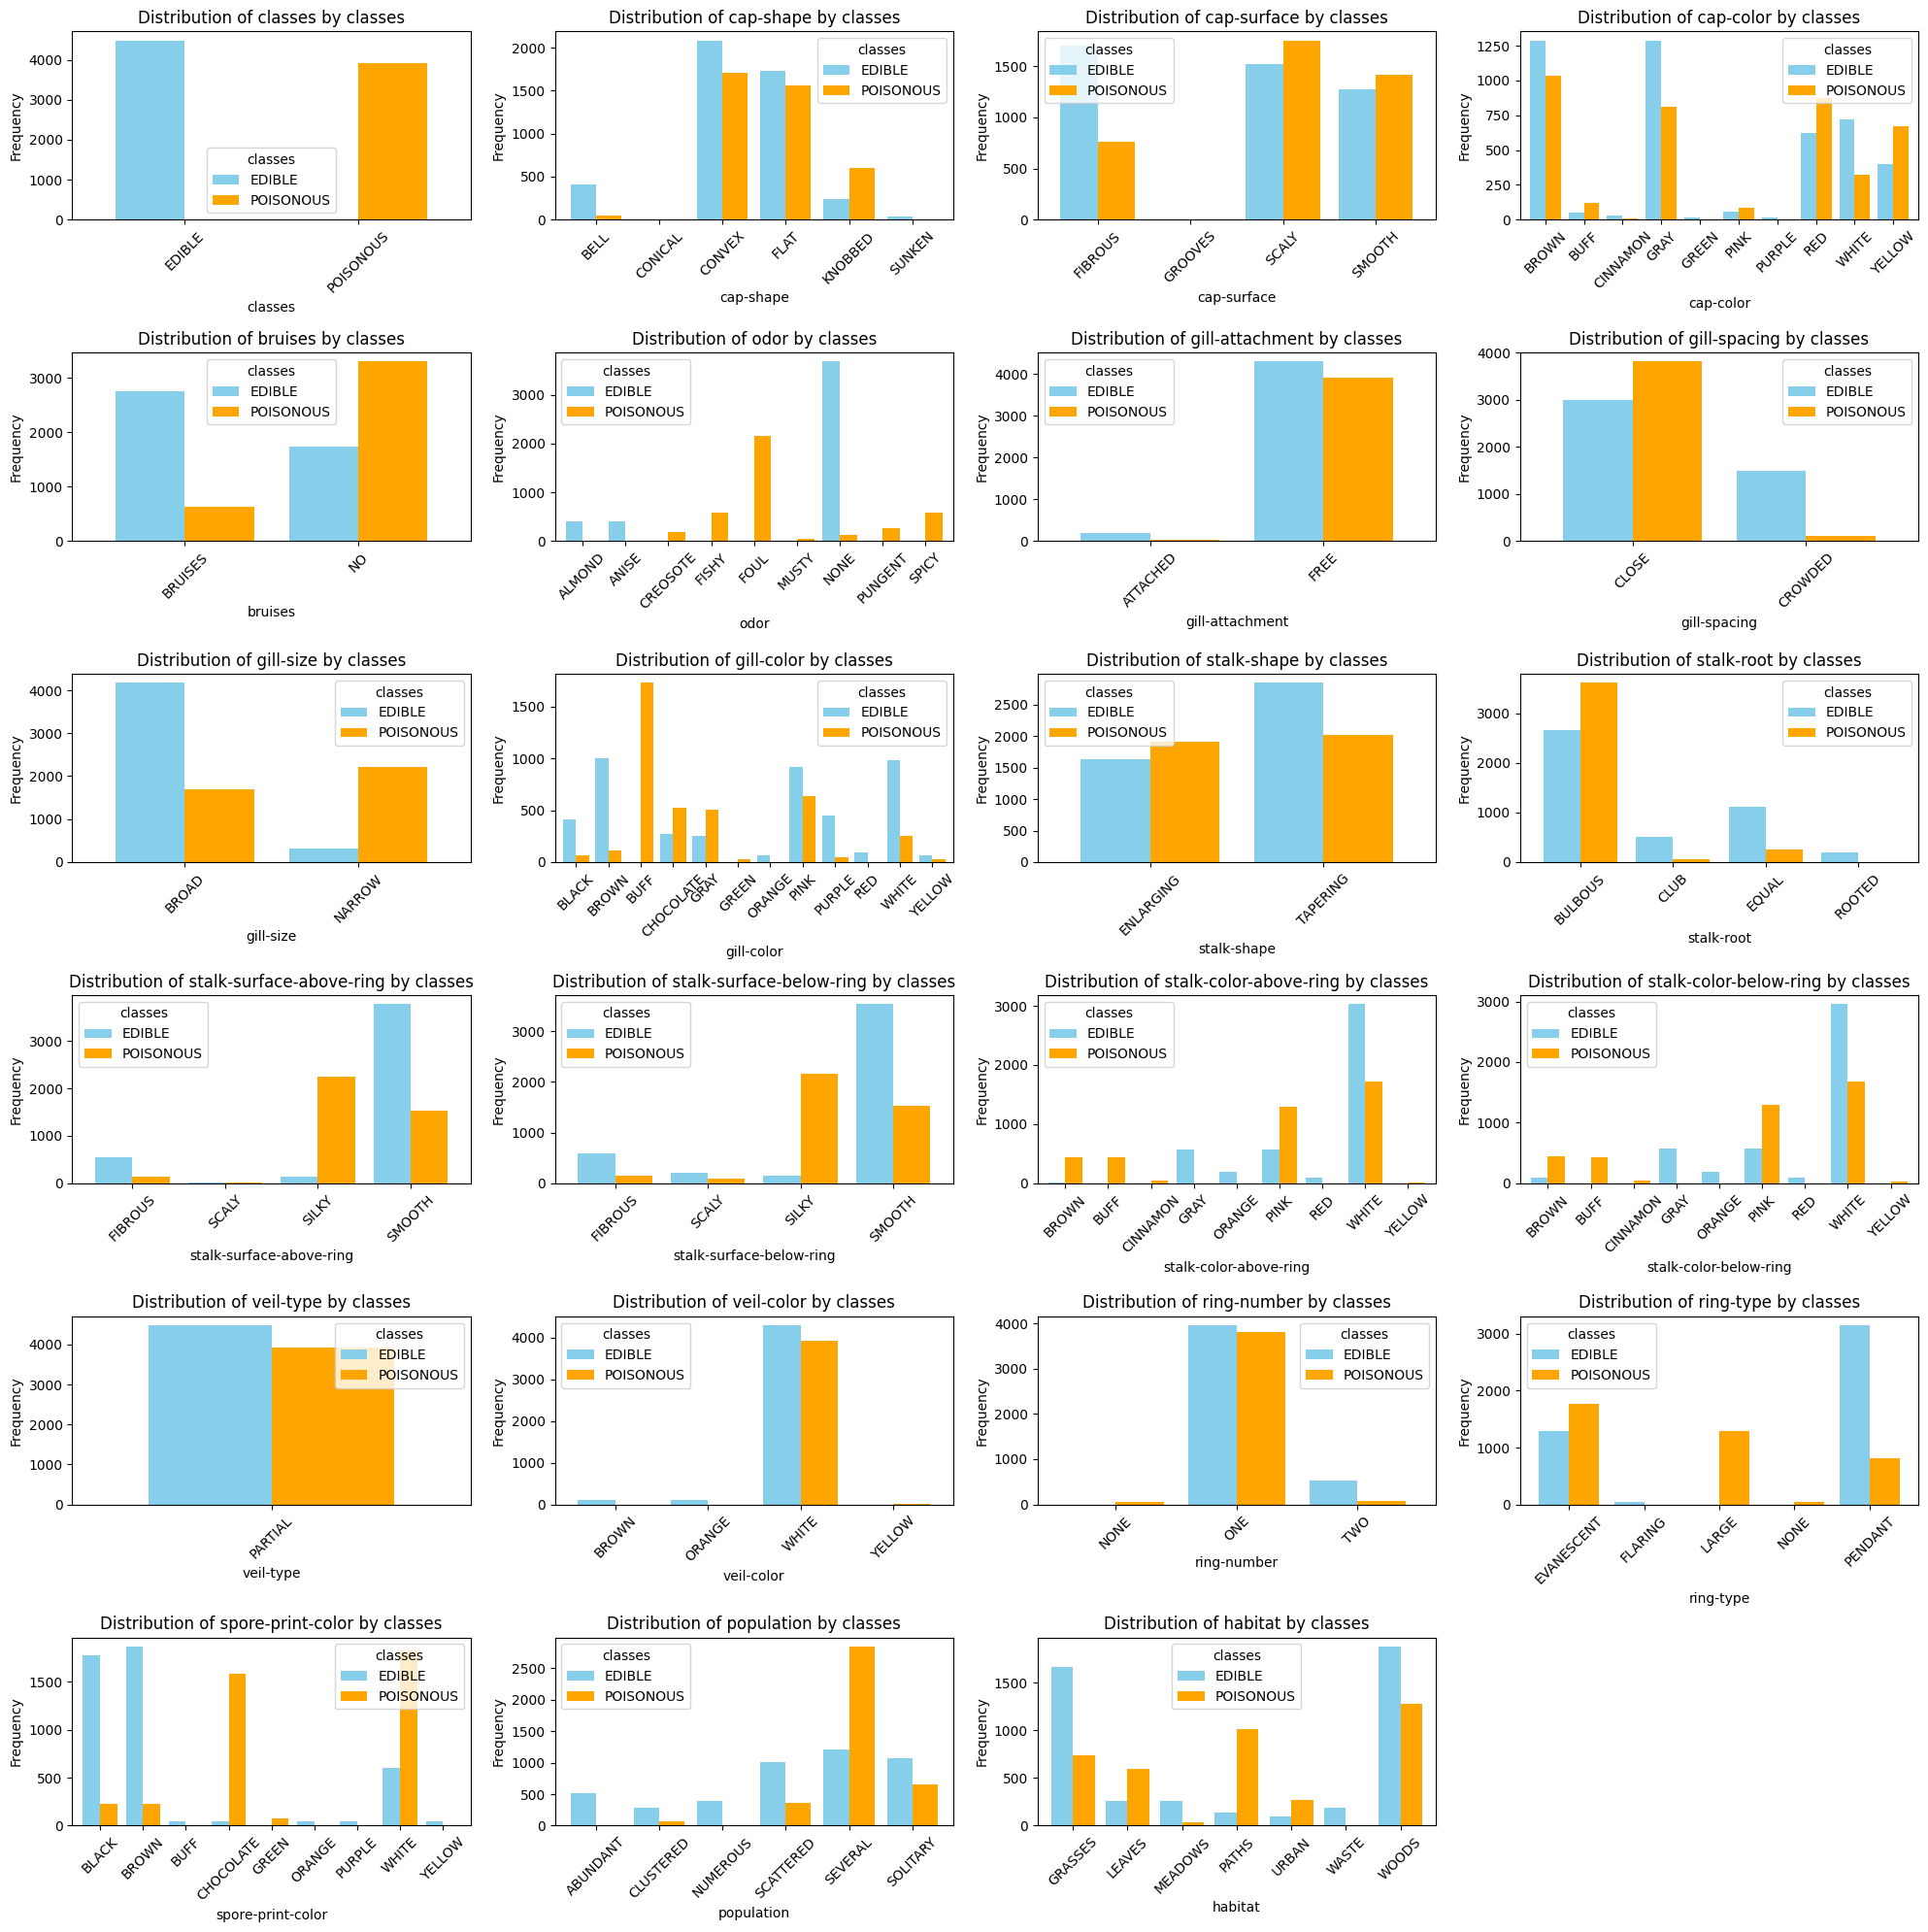

In [ ]:
import matplotlib.pyplot as plt

# Define the target variable
target = 'classes'
num_rows = (len(df.columns) - 1) // 5  # Number of rows

# Create subplots
fig, axes = plt.subplots(num_rows, 4, figsize=(20, 20))
axes = axes.flatten()

# Iterate over each column and create a bar plot
for i, column in enumerate(df.columns):
        ax = axes[i]
        df.groupby([column, target]).size().unstack().plot(kind='bar', color=['skyblue', 'orange'], width=0.8, ax=ax)
        ax.set_title(f'Distribution of {column} by {target}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        ax.legend(title=target)
        ax.tick_params(axis='x', rotation=45)

# Hide any unused subplots
for i in range(len(df.columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

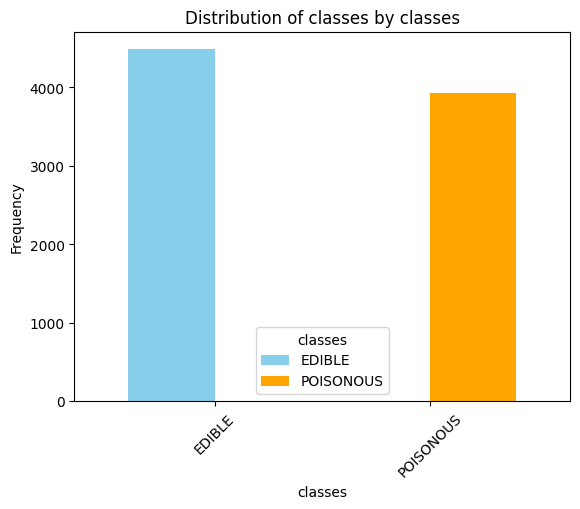

<Figure size 800x600 with 0 Axes>

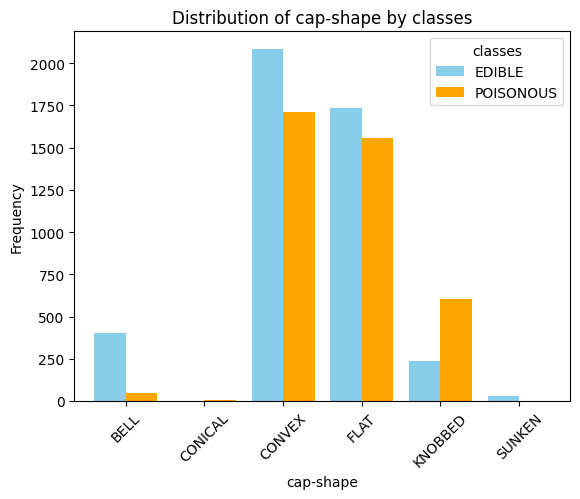

<Figure size 800x600 with 0 Axes>

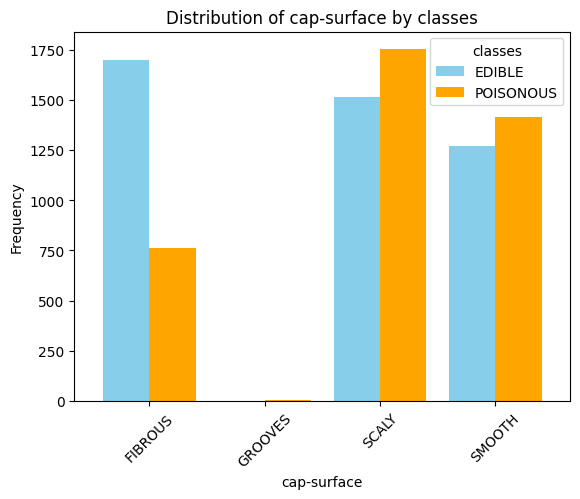

<Figure size 800x600 with 0 Axes>

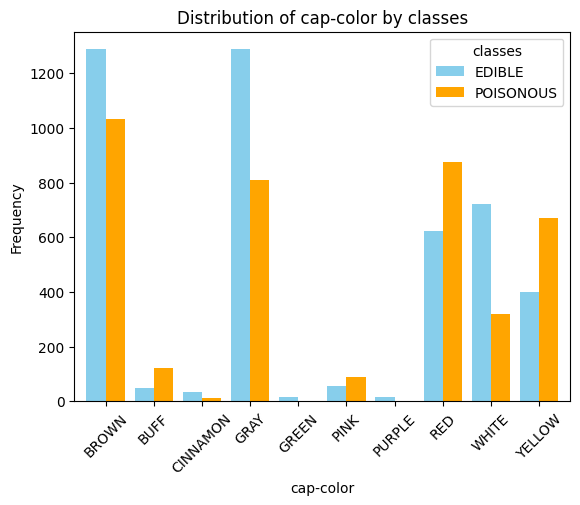

<Figure size 800x600 with 0 Axes>

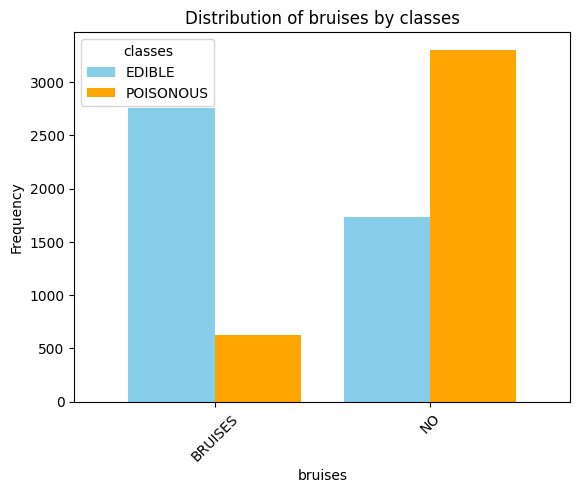

<Figure size 800x600 with 0 Axes>

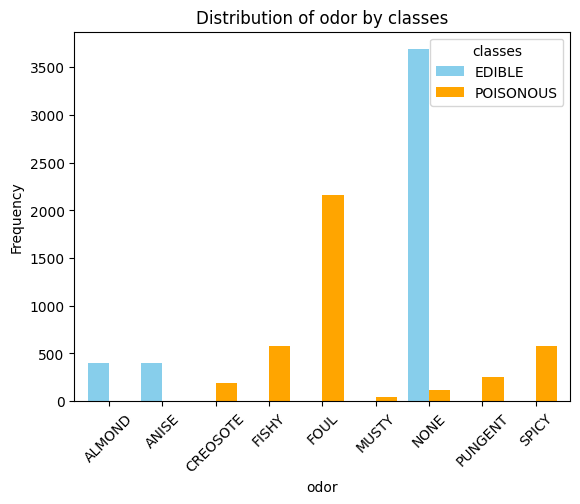

<Figure size 800x600 with 0 Axes>

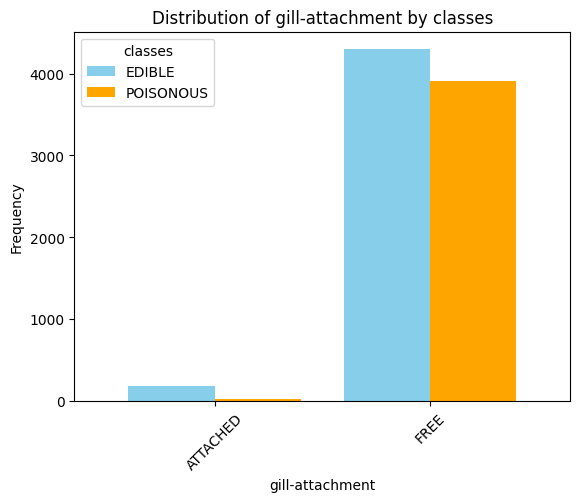

<Figure size 800x600 with 0 Axes>

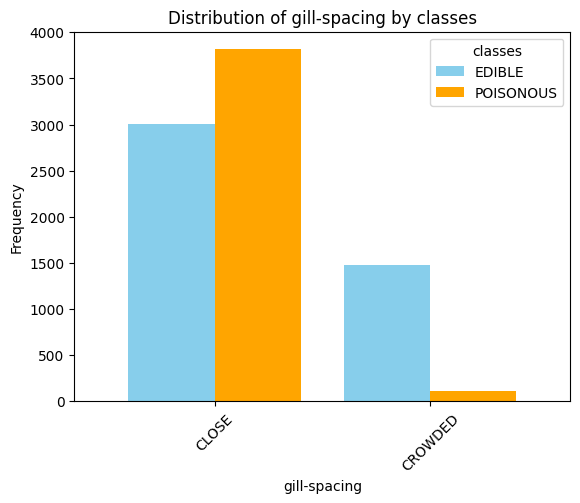

<Figure size 800x600 with 0 Axes>

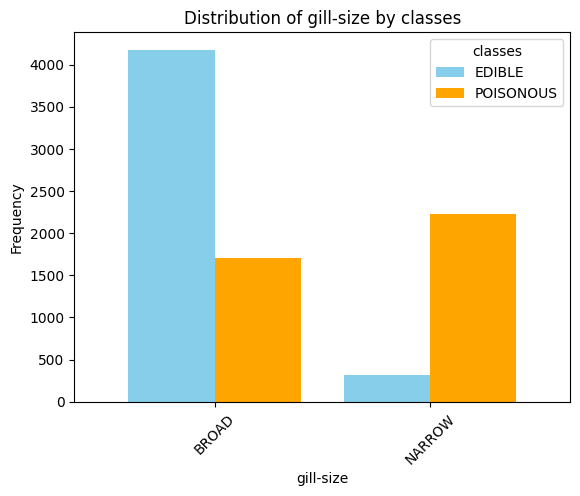

<Figure size 800x600 with 0 Axes>

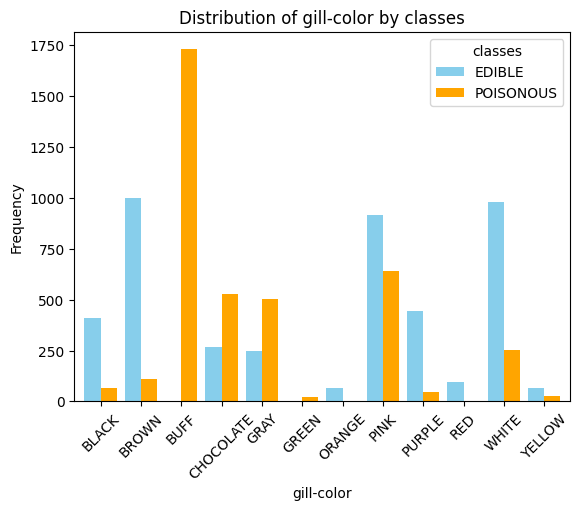

<Figure size 800x600 with 0 Axes>

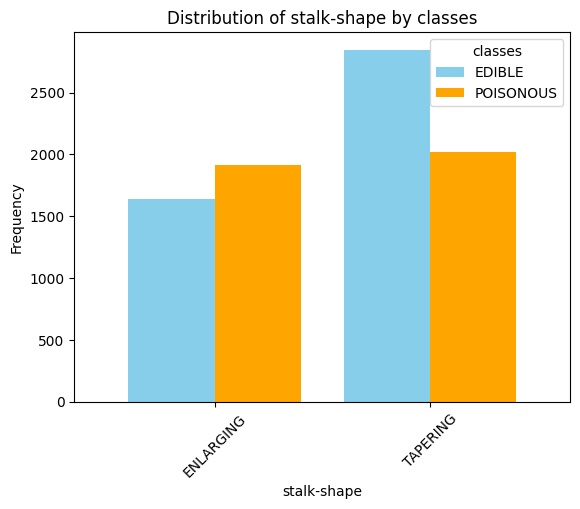

<Figure size 800x600 with 0 Axes>

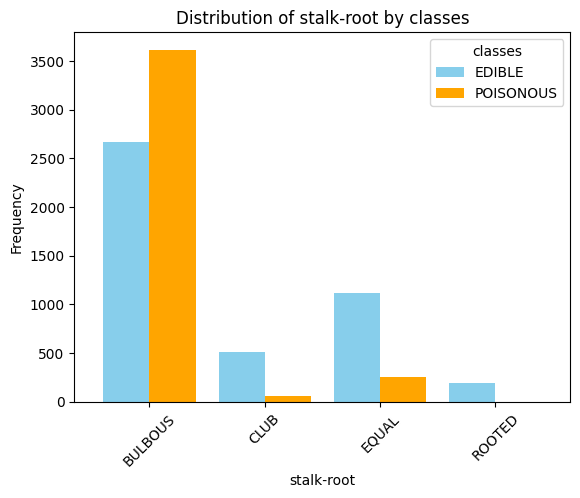

<Figure size 800x600 with 0 Axes>

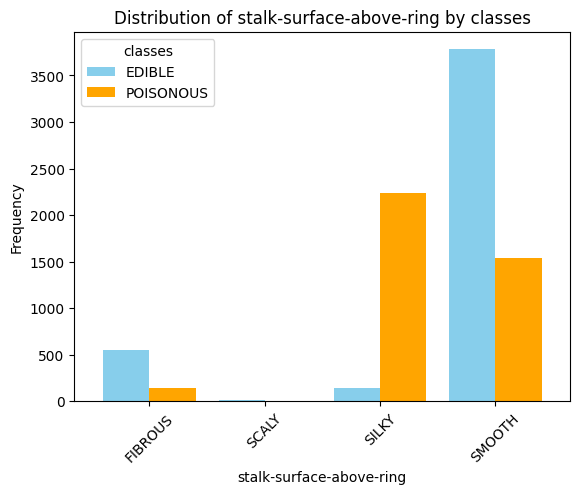

<Figure size 800x600 with 0 Axes>

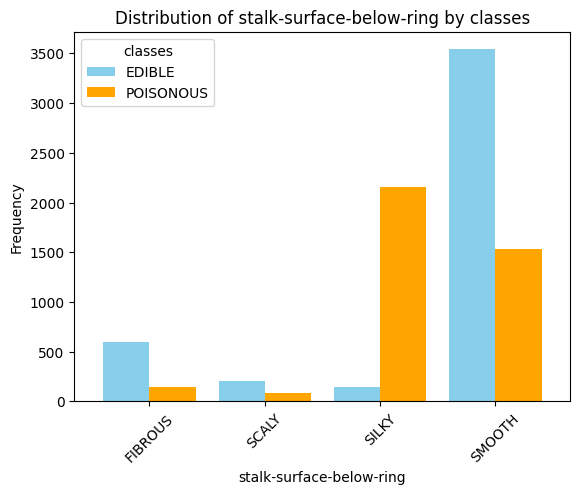

<Figure size 800x600 with 0 Axes>

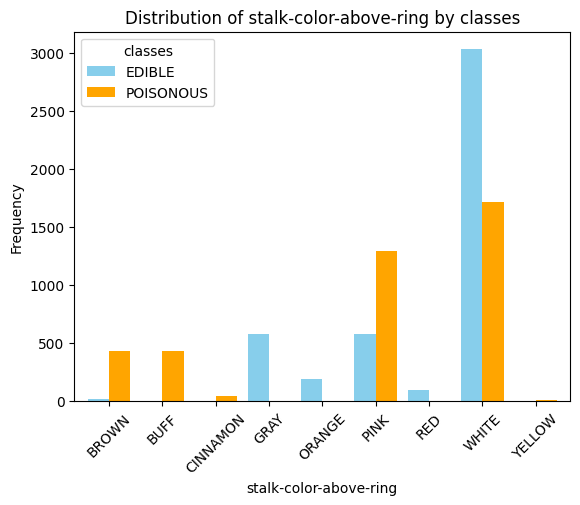

<Figure size 800x600 with 0 Axes>

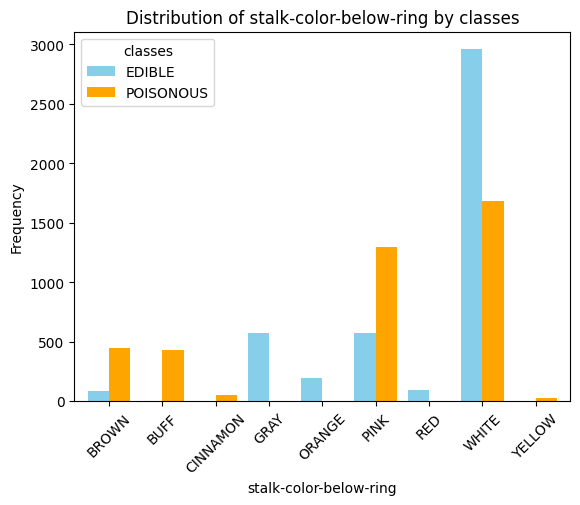

<Figure size 800x600 with 0 Axes>

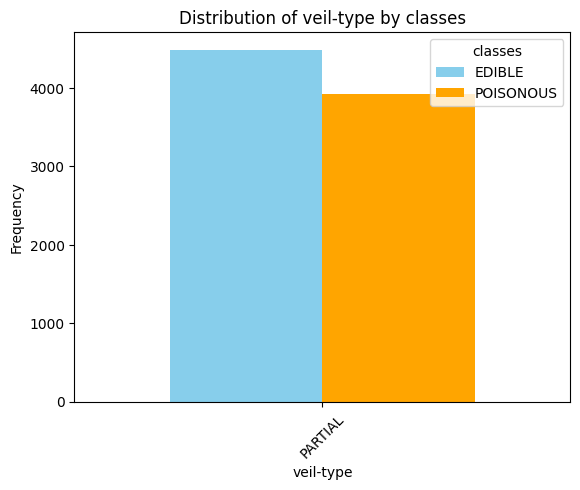

<Figure size 800x600 with 0 Axes>

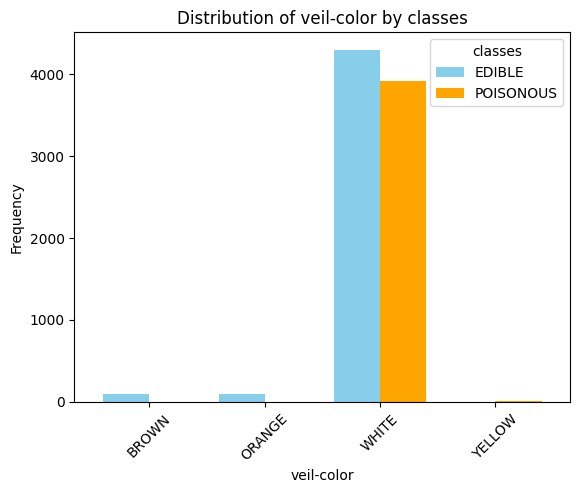

<Figure size 800x600 with 0 Axes>

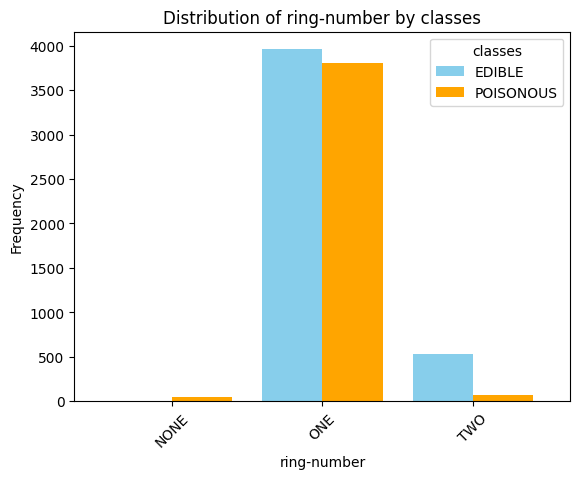

<Figure size 800x600 with 0 Axes>

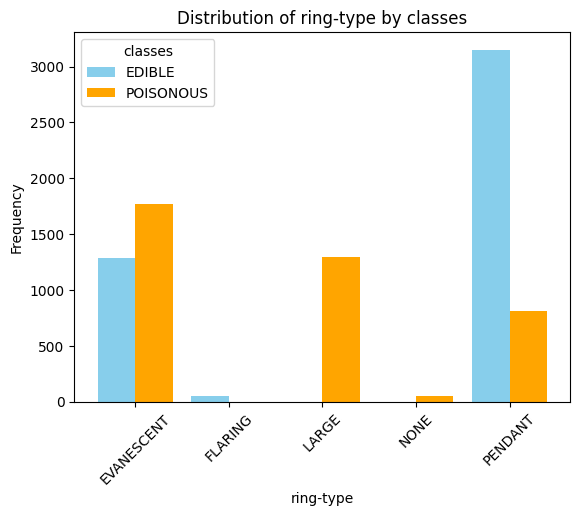

<Figure size 800x600 with 0 Axes>

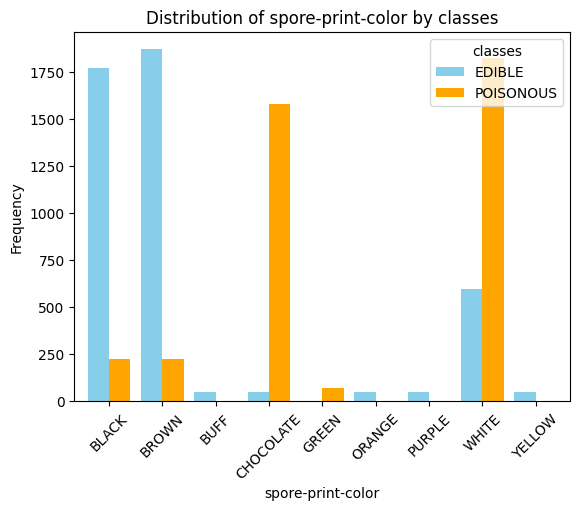

<Figure size 800x600 with 0 Axes>

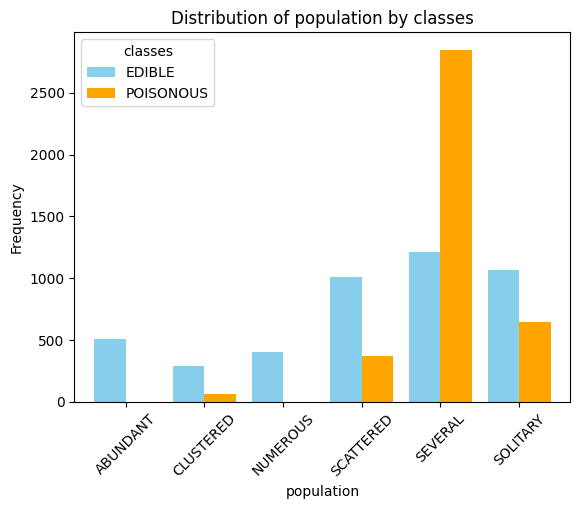

<Figure size 800x600 with 0 Axes>

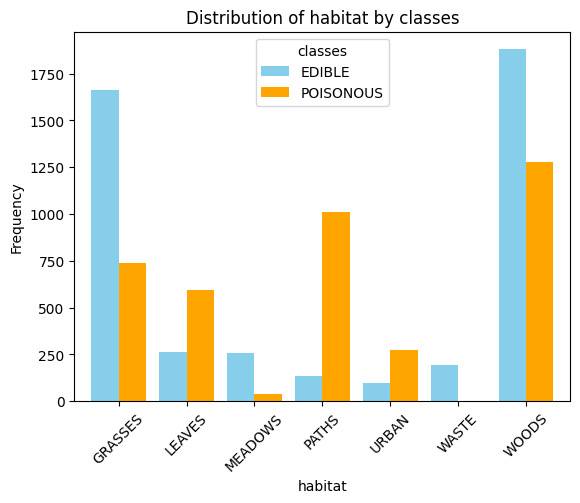

In [ ]:
# Plot Bar graph
target = 'classes'
for column in df.columns:
        plt.figure(figsize=(8, 6))
        df.groupby([column, target]).size().unstack().plot(kind='bar', color=['skyblue', 'orange'], width=0.8)
        plt.title(f'Distribution of {column} by {target}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45)
        plt.legend(title=target)
        plt.show()


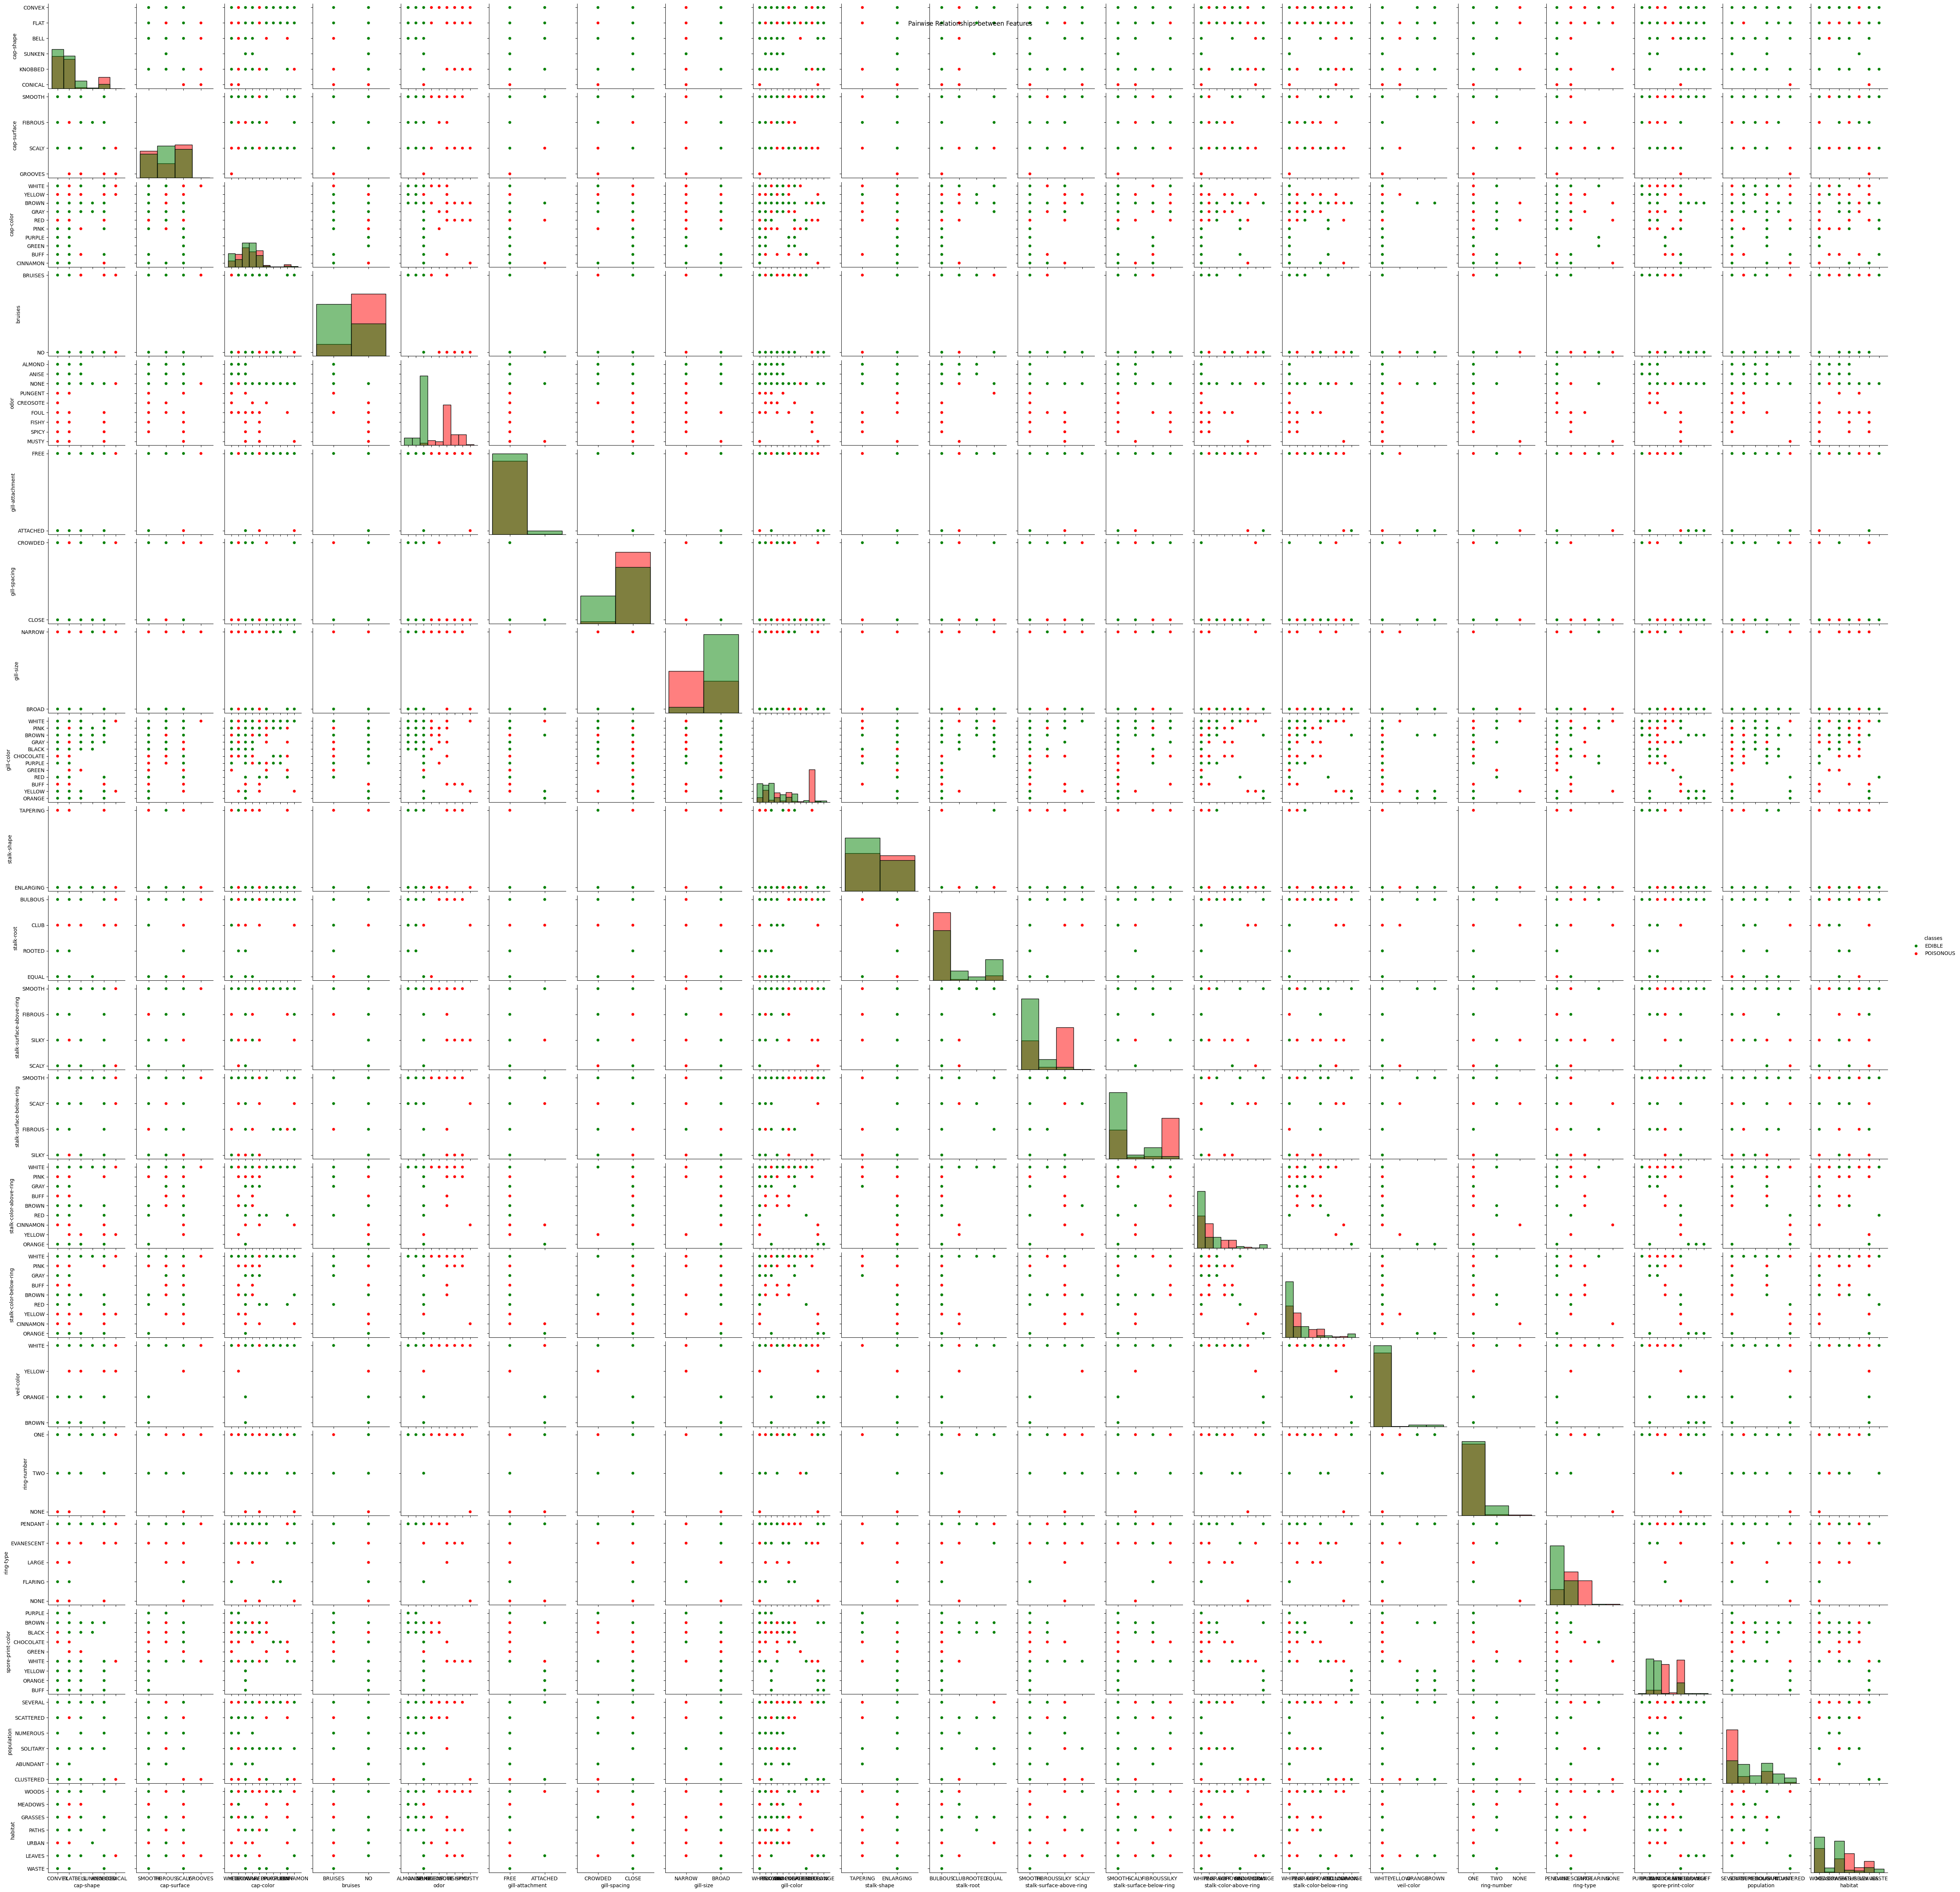

In [ ]:
# Separate the dataset into edible and poisonous classes
edi = df[df['classes'] == 'EDIBLE']
poi = df[df['classes'] == 'POISONOUS']

# Extract column names excluding 'classes'
props = list(df.columns)
props.remove('classes')

# Plot pair plots
sns.pairplot(df, hue='classes', vars=props, diag_kind='hist', palette={'EDIBLE': 'green', 'POISONOUS': 'red'})
plt.suptitle("Pairwise Relationships between Features")
plt.show()

<ipython-input-107-0b6c9034b99e>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 3))


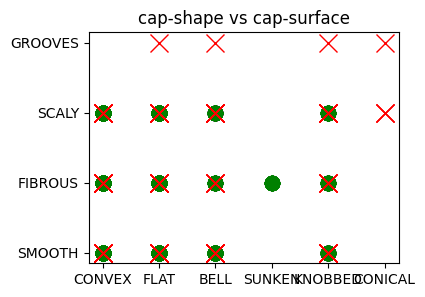

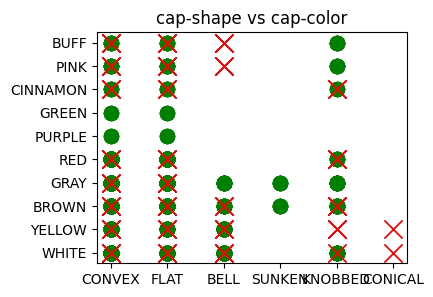

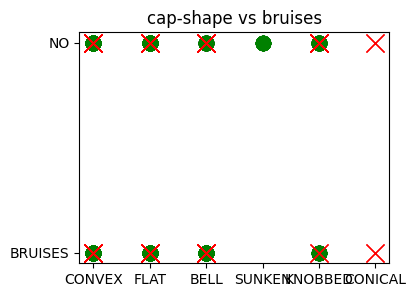

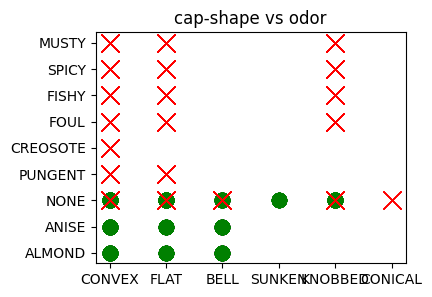

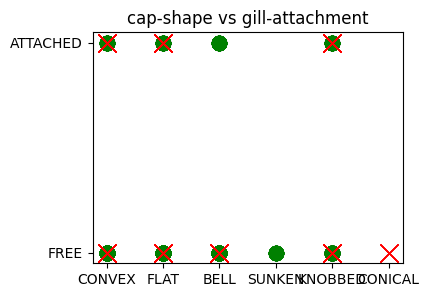

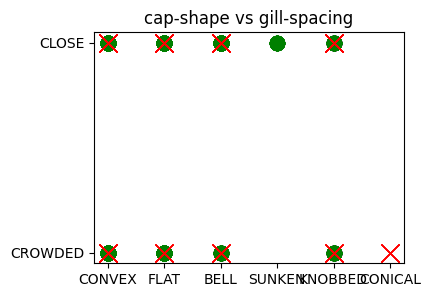

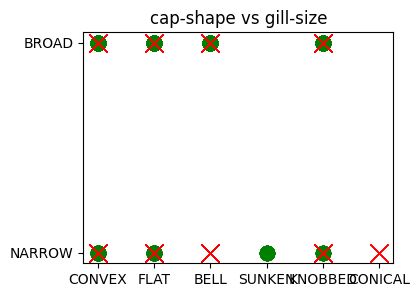

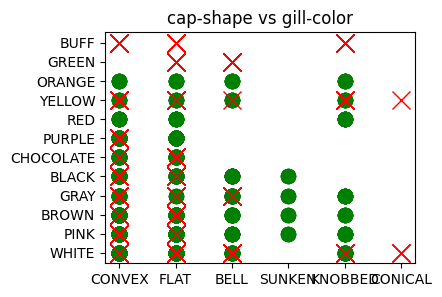

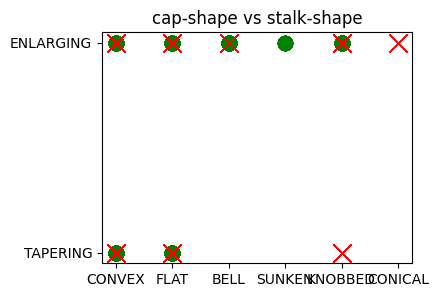

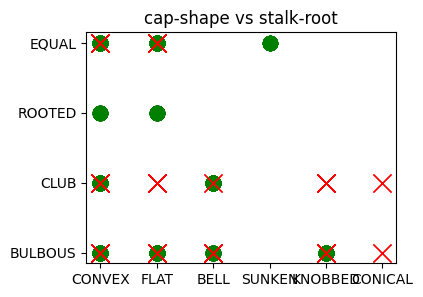

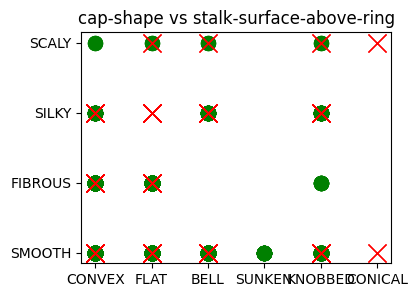

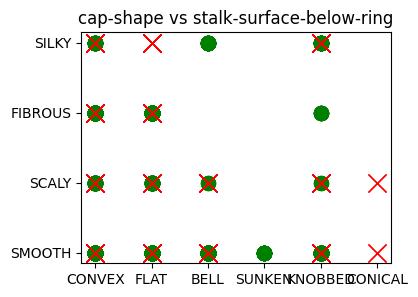

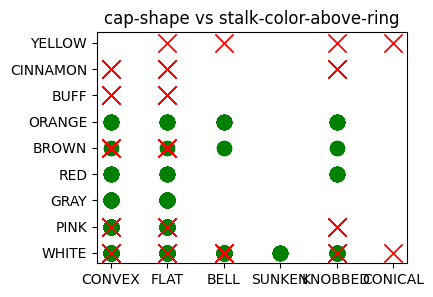

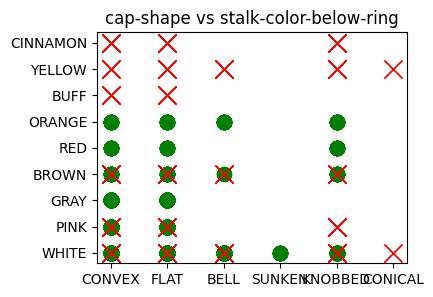

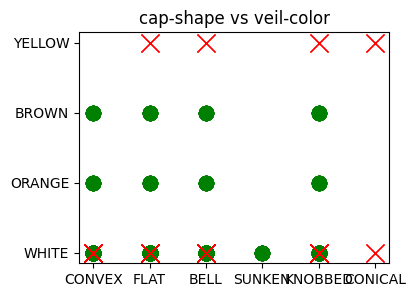

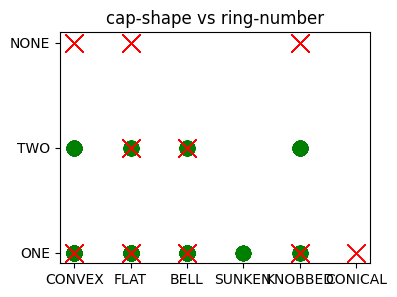

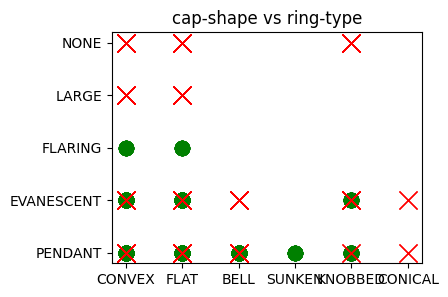

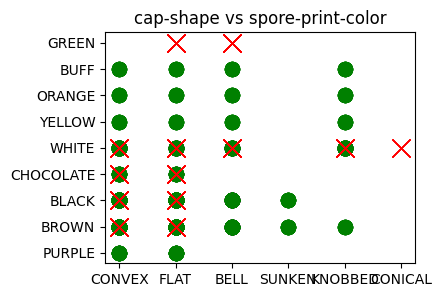

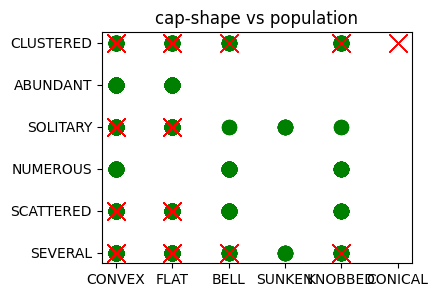

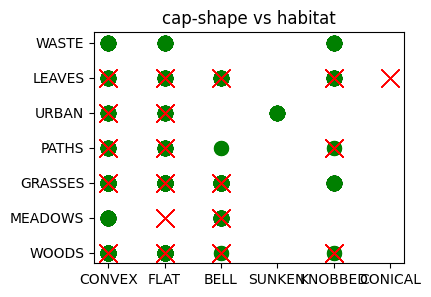

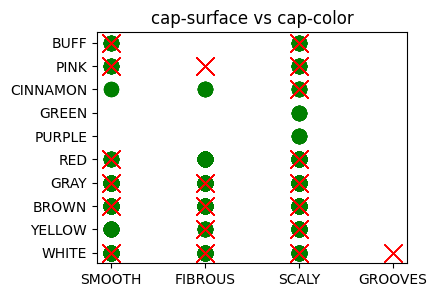

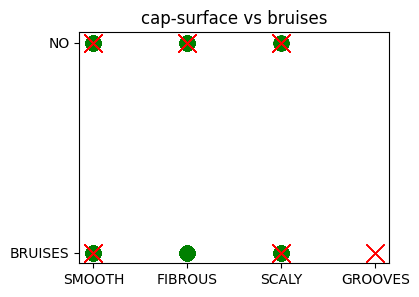

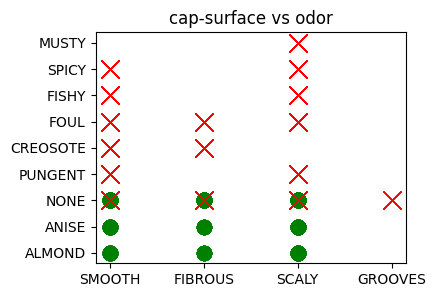

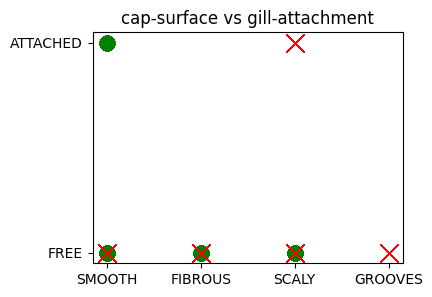

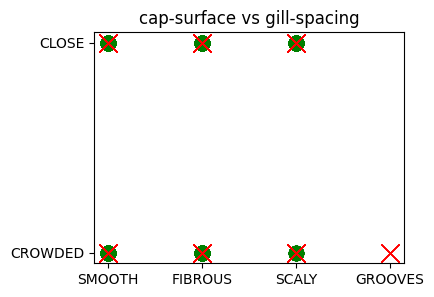

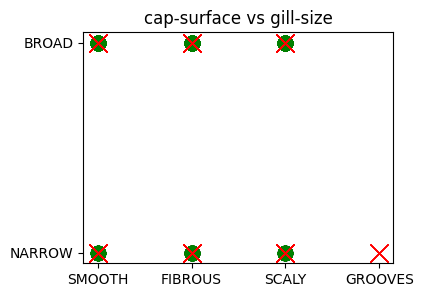

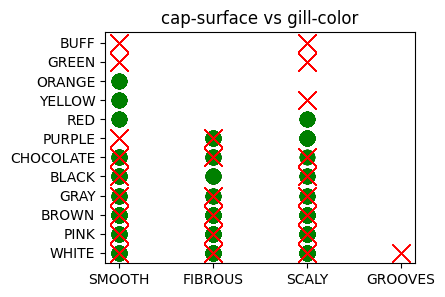

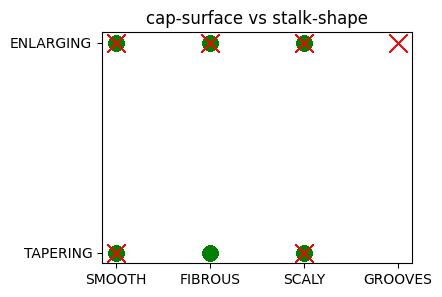

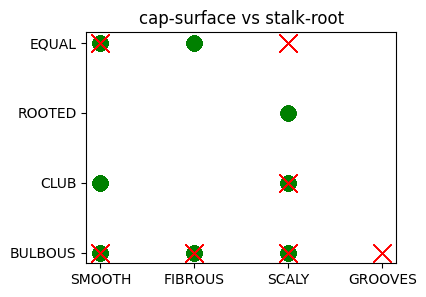

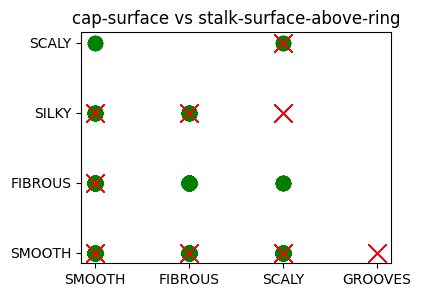

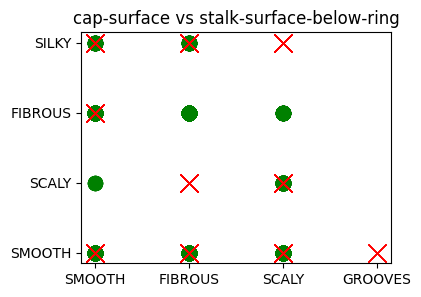

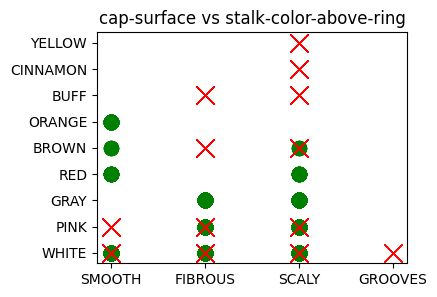

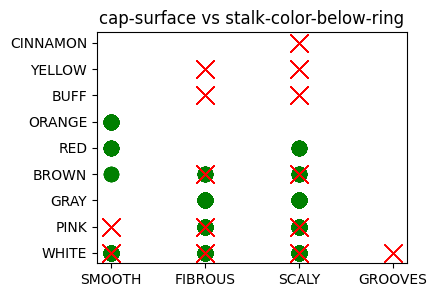

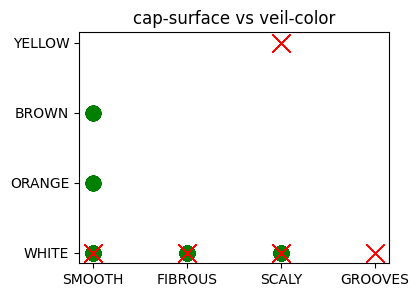

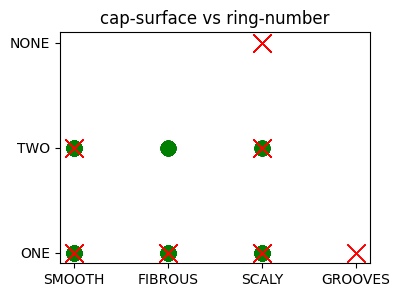

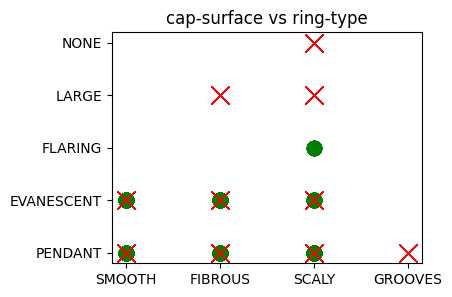

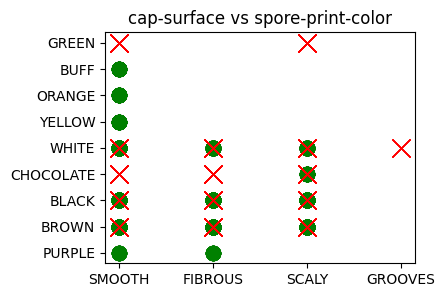

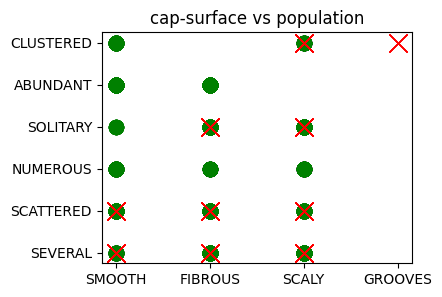

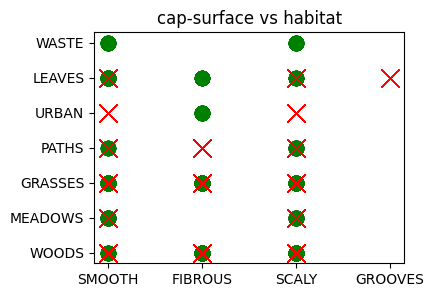

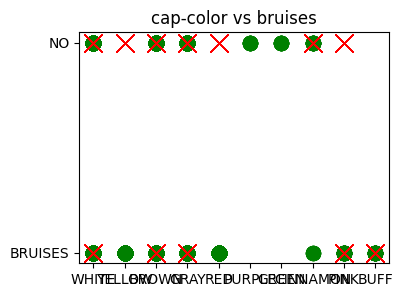

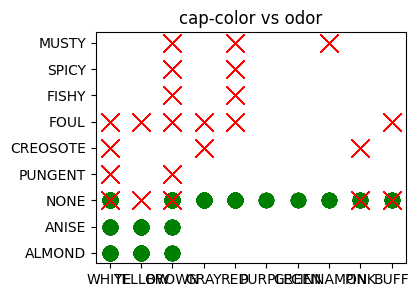

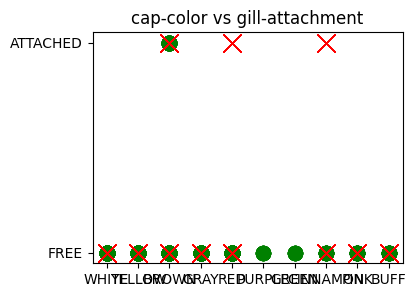

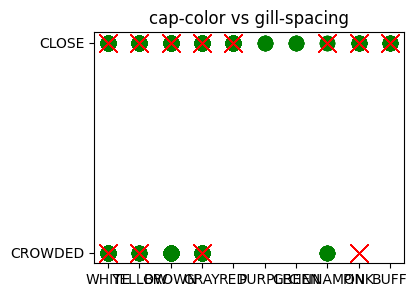

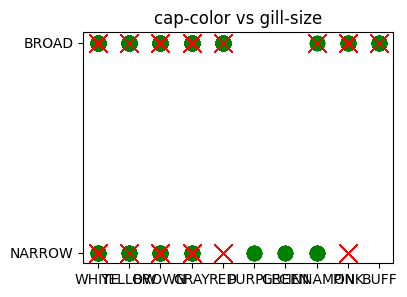

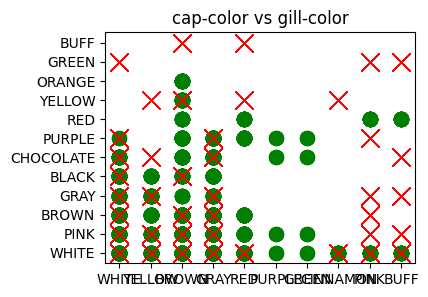

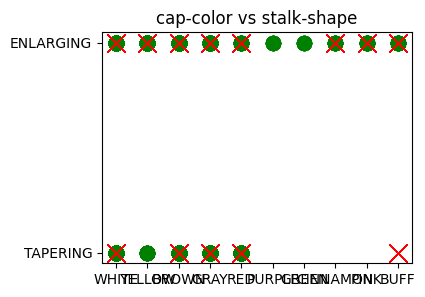

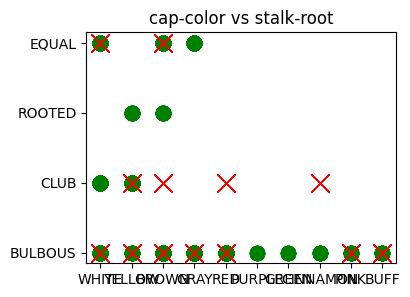

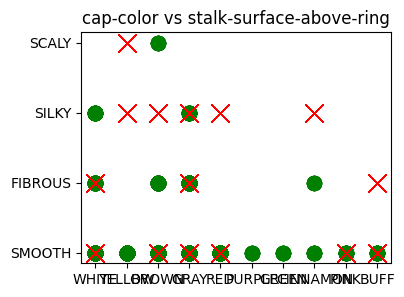

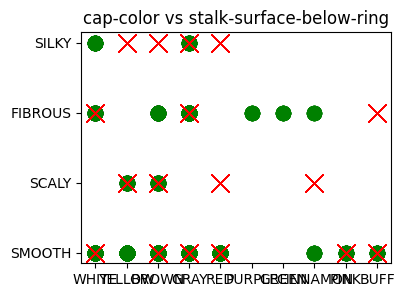

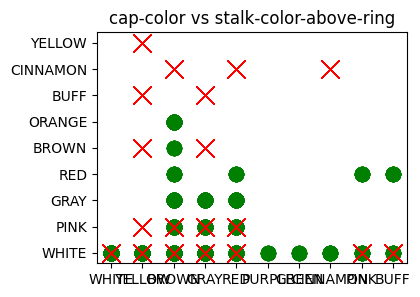

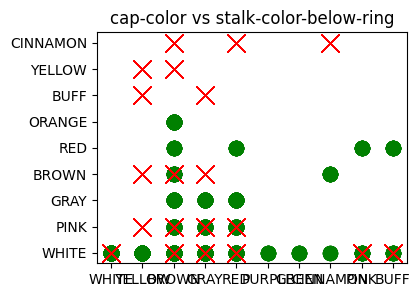

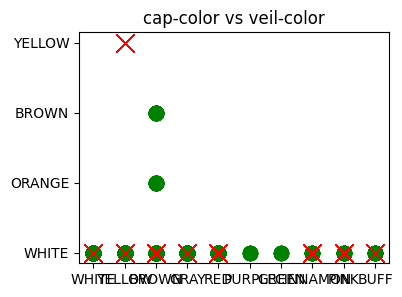

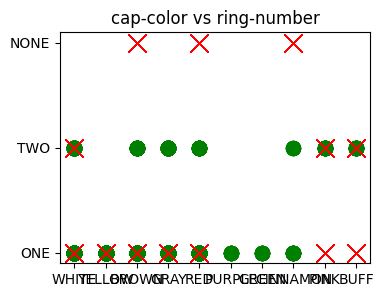

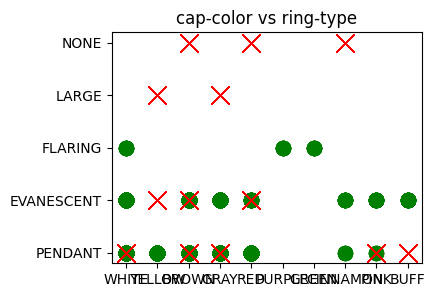

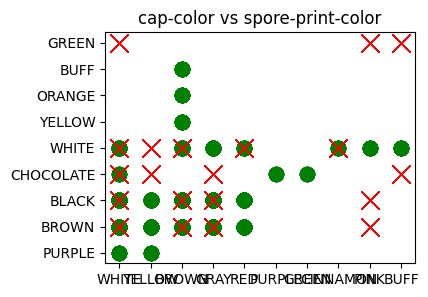

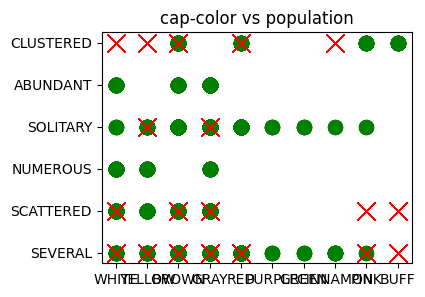

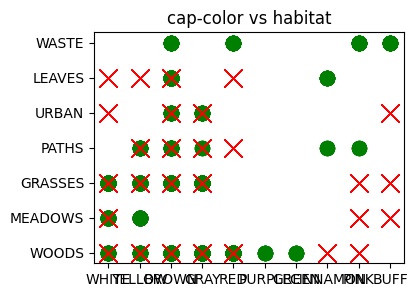

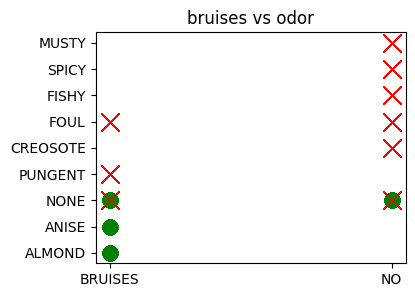

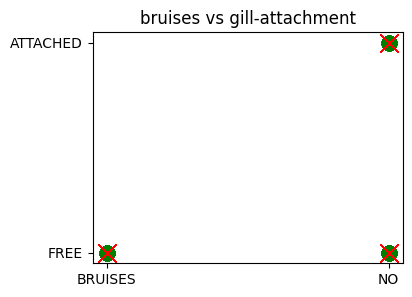

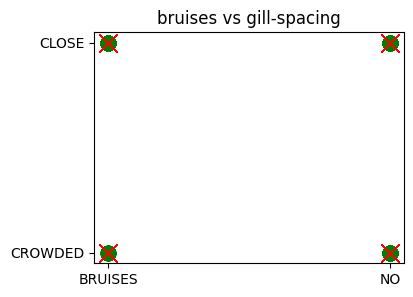

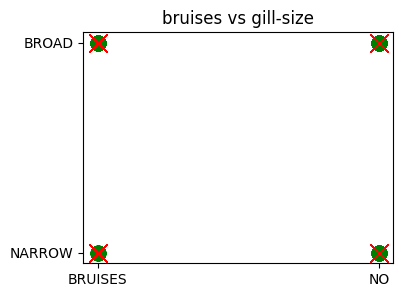

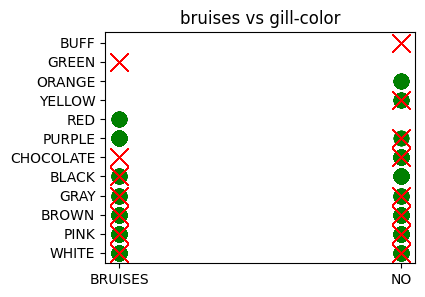

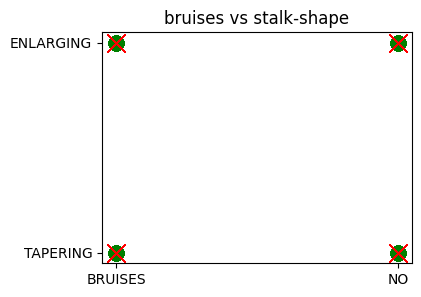

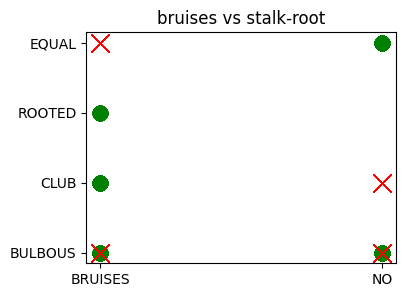

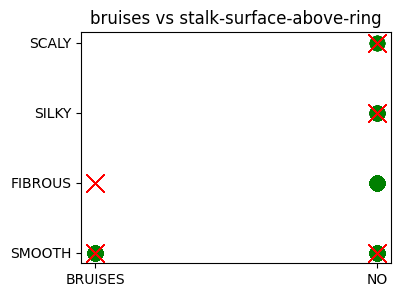

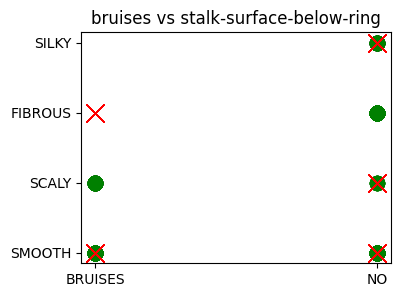

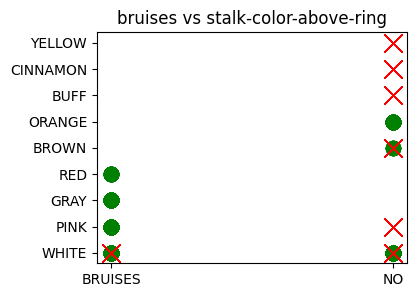

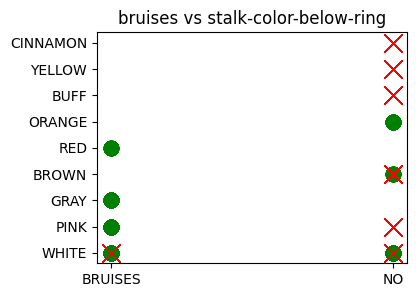

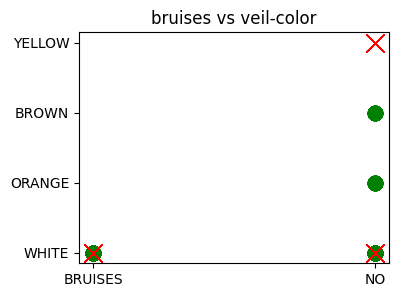

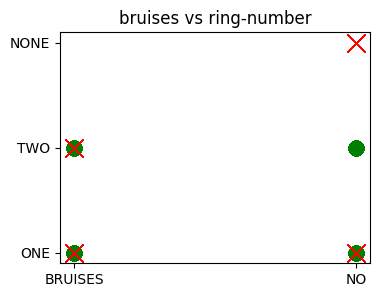

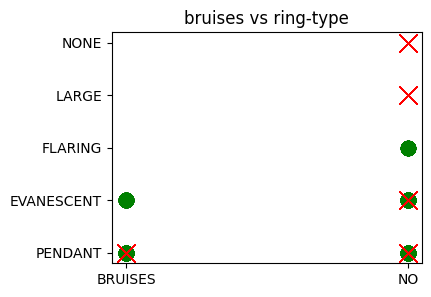

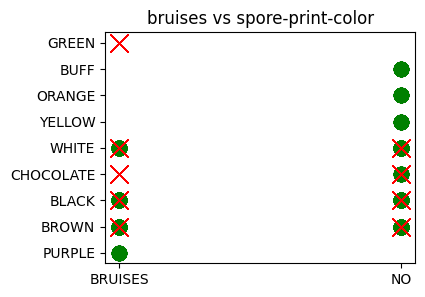

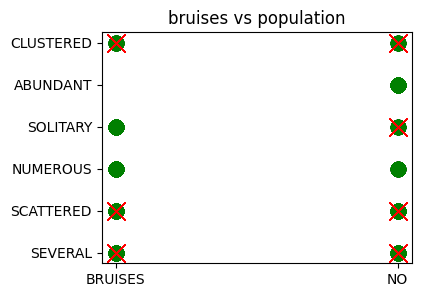

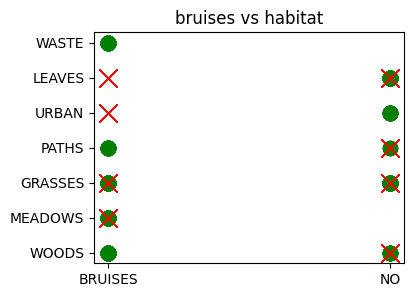

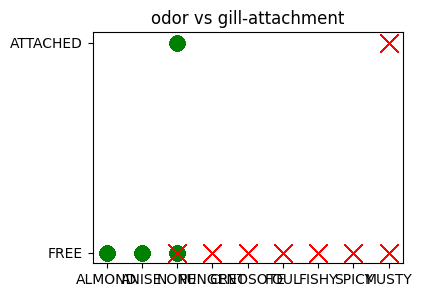

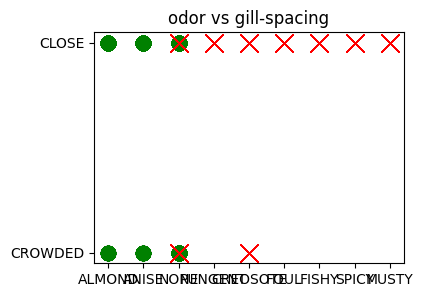

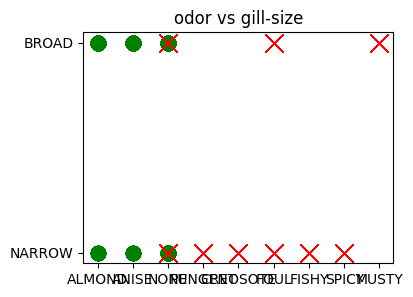

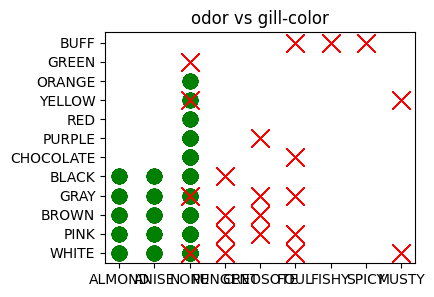

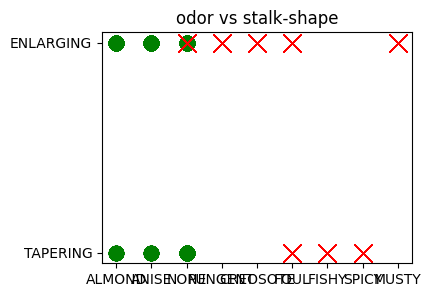

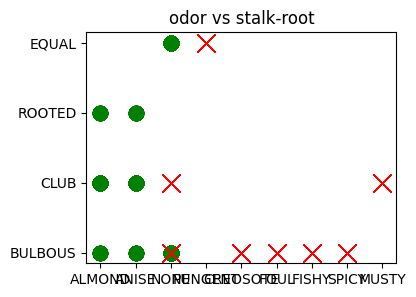

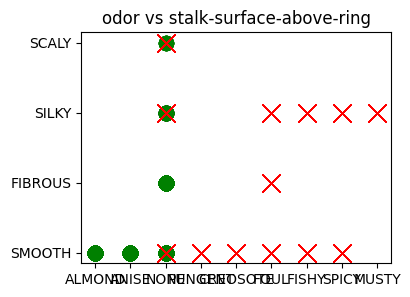

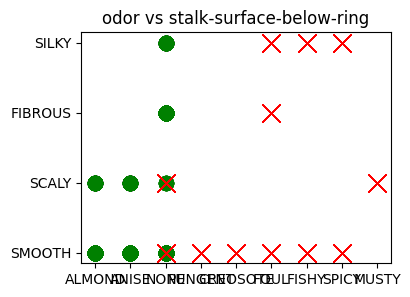

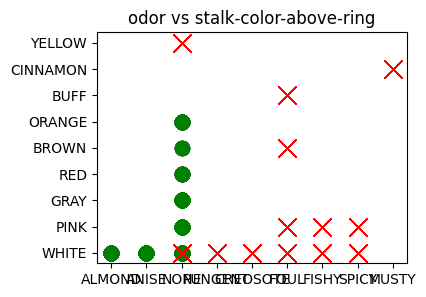

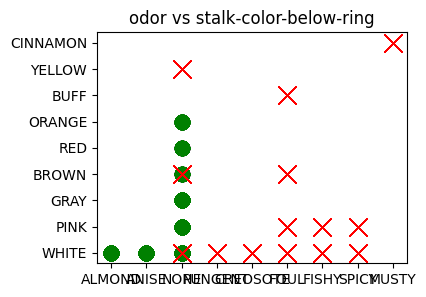

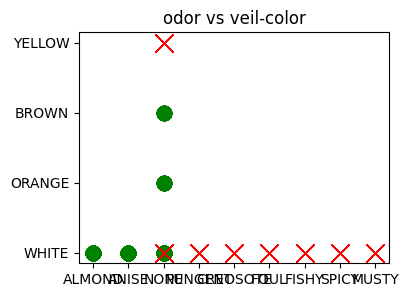

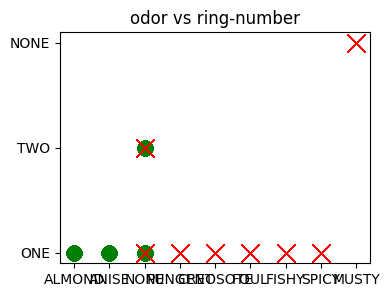

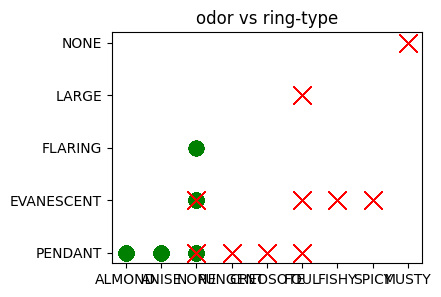

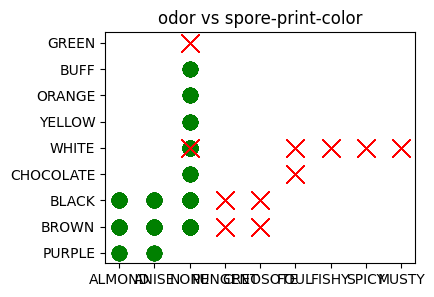

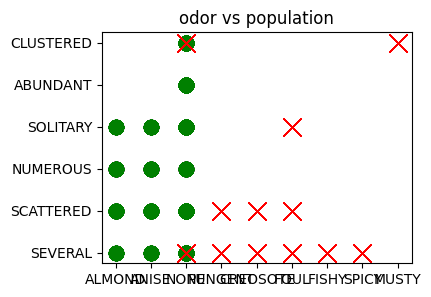

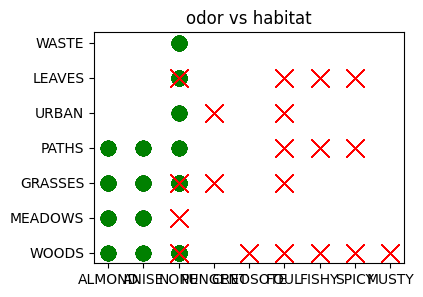

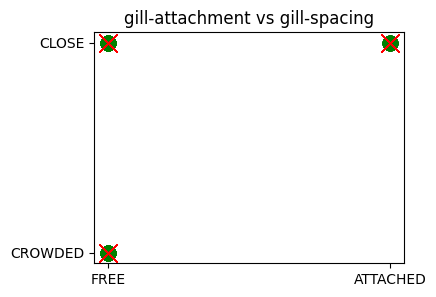

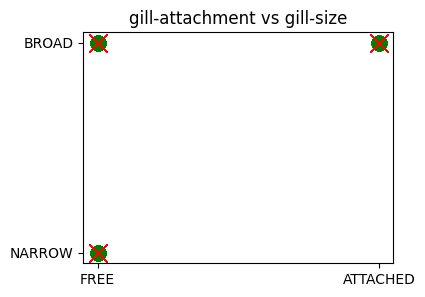

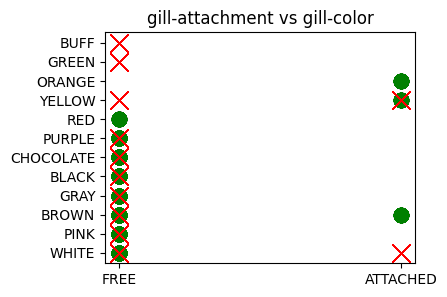

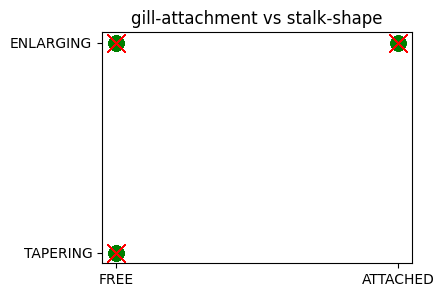

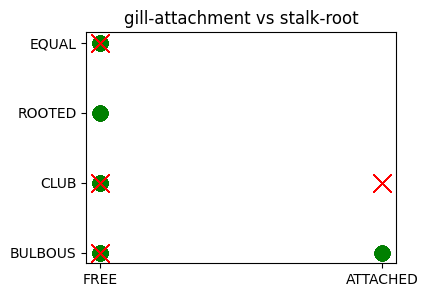

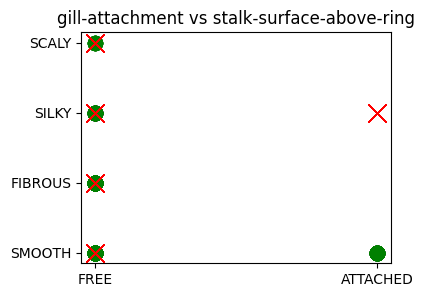

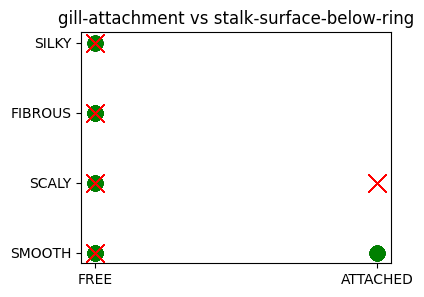

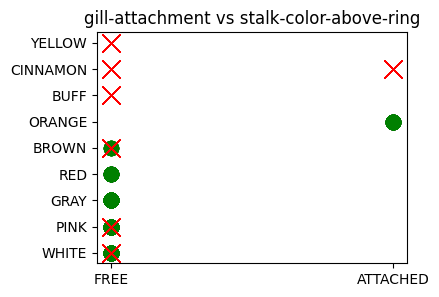

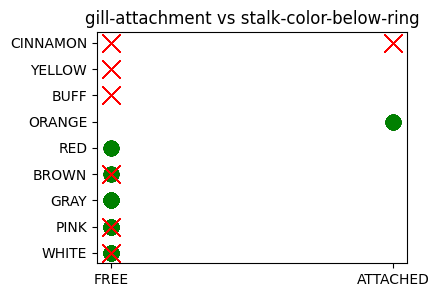

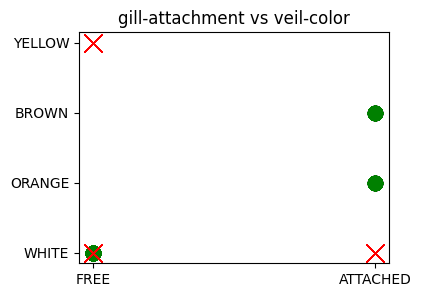

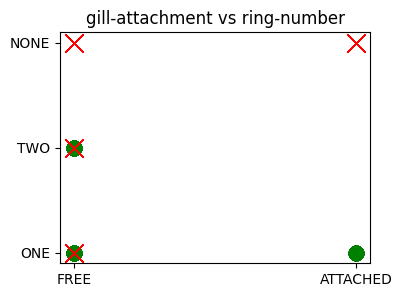

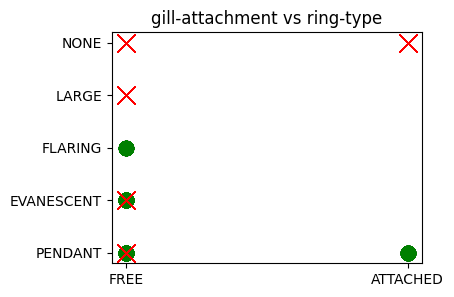

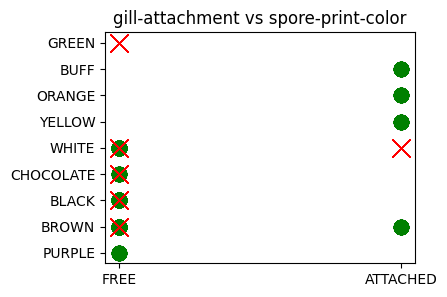

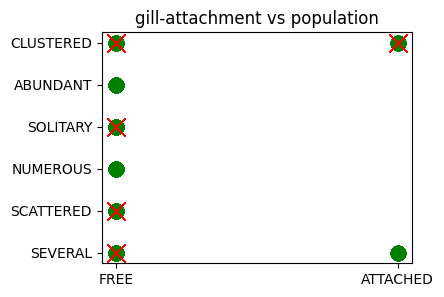

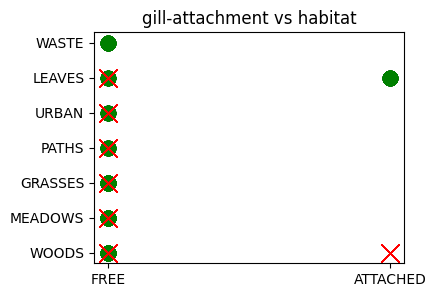

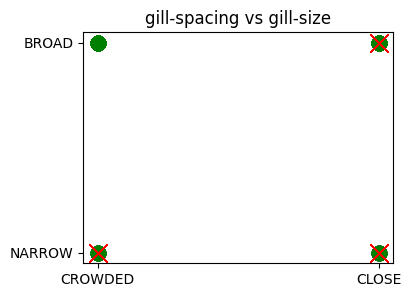

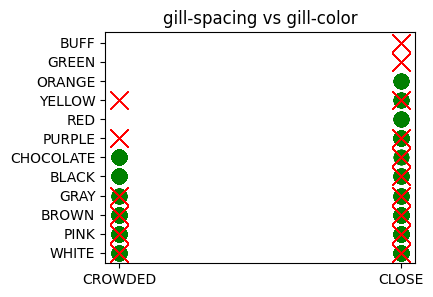

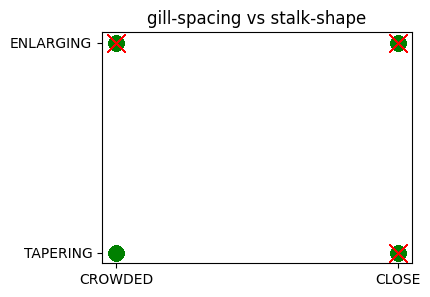

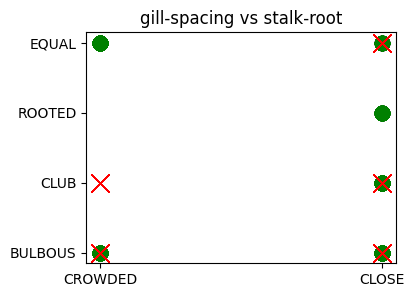

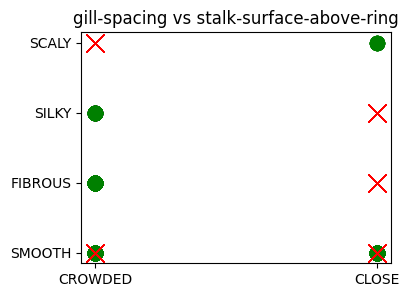

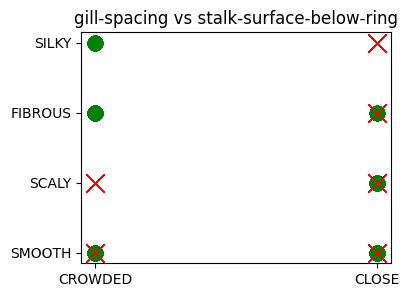

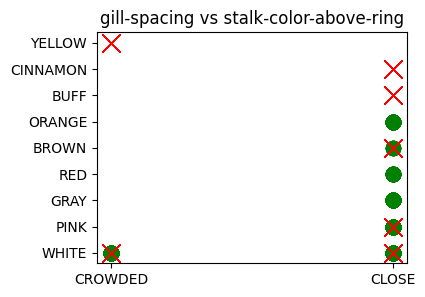

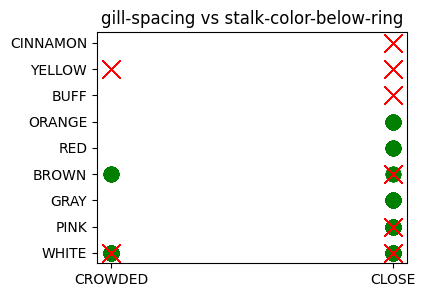

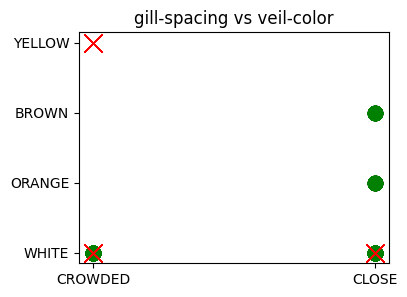

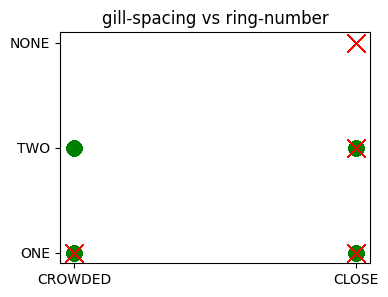

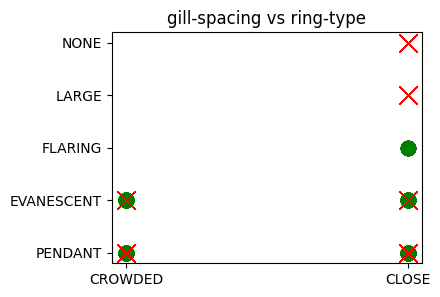

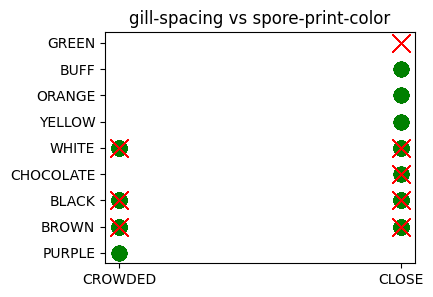

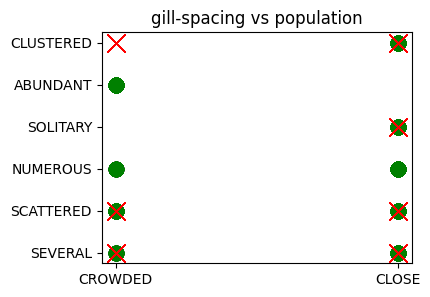

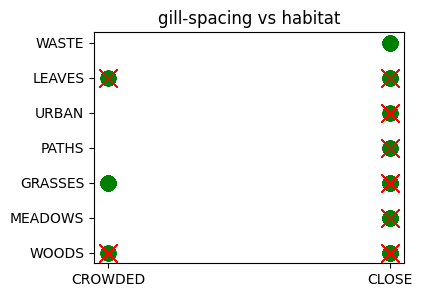

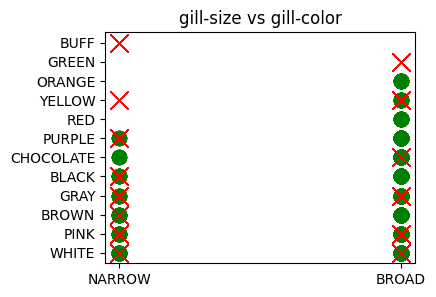

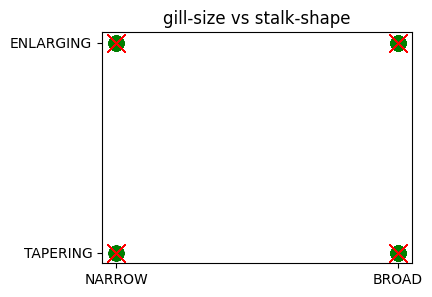

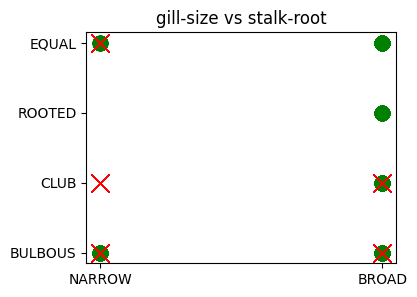

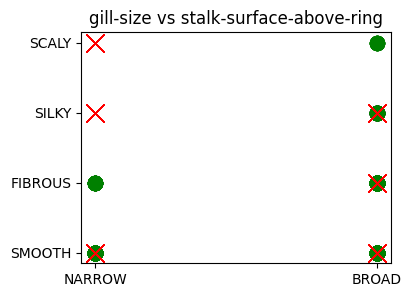

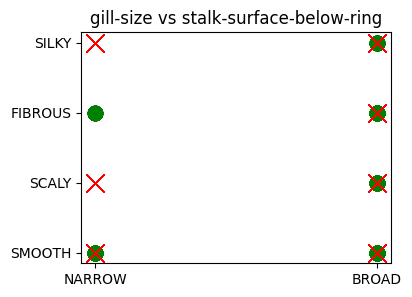

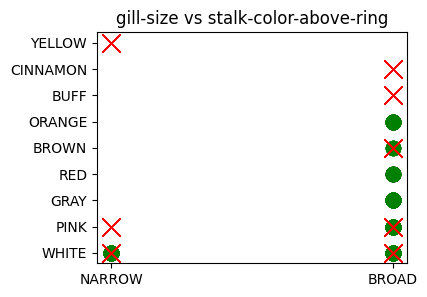

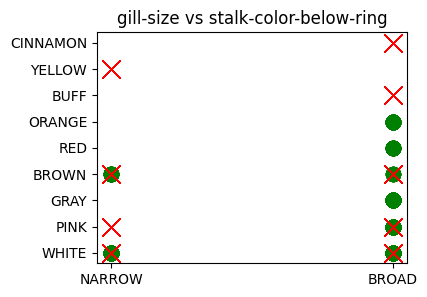

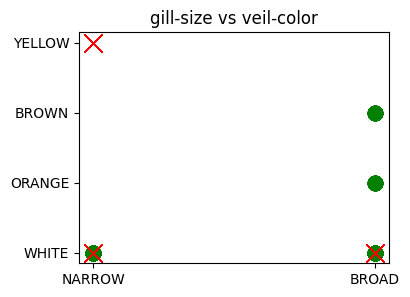

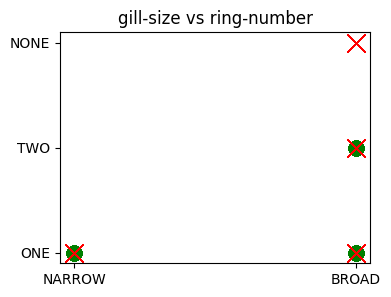

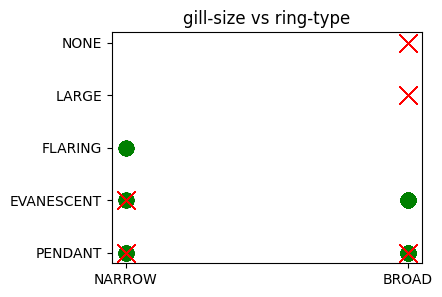

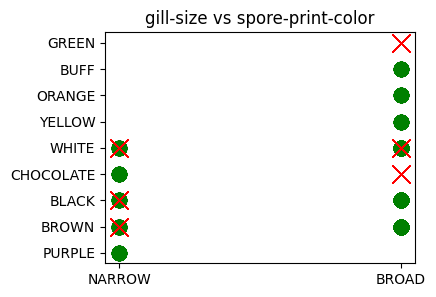

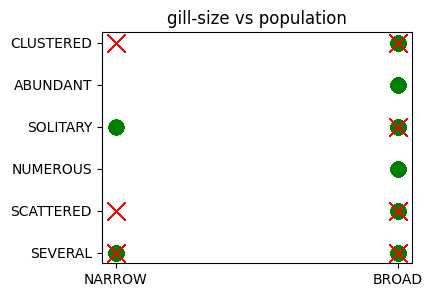

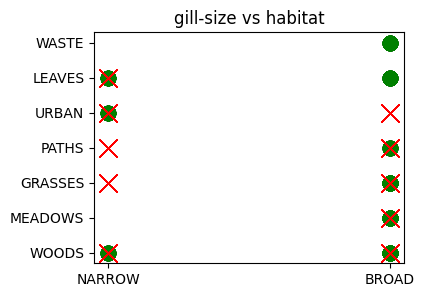

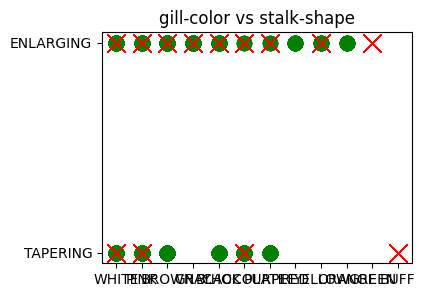

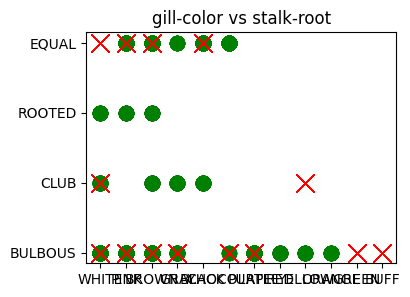

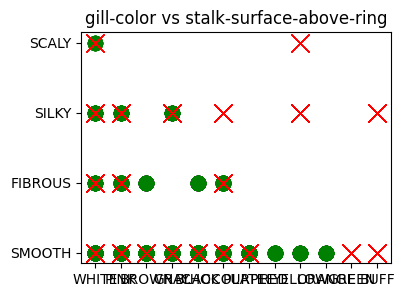

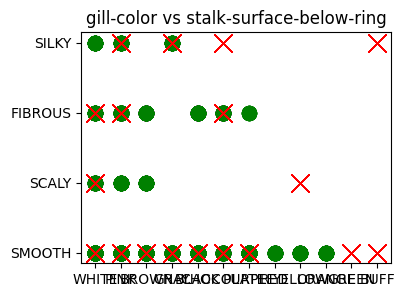

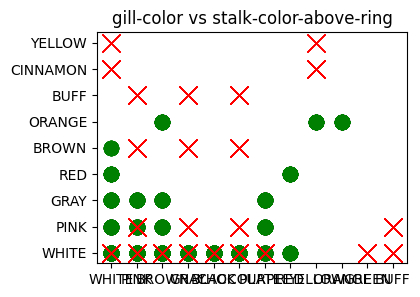

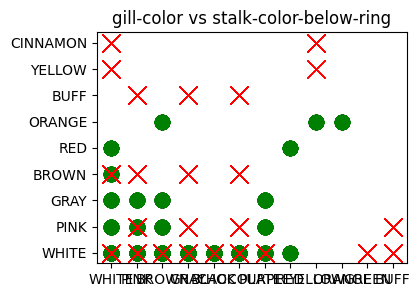

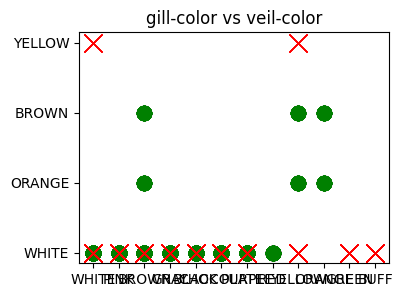

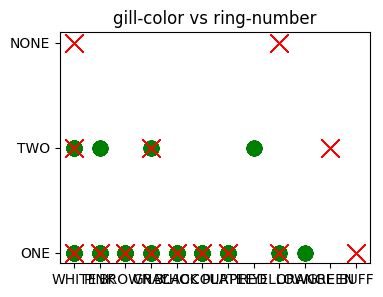

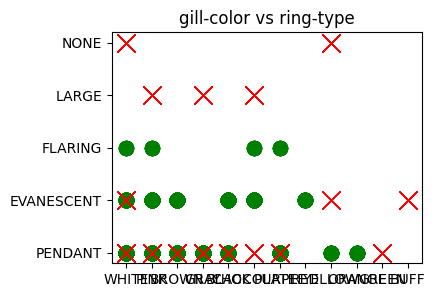

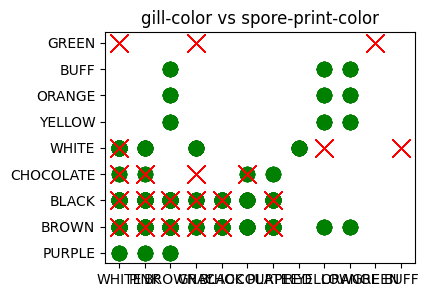

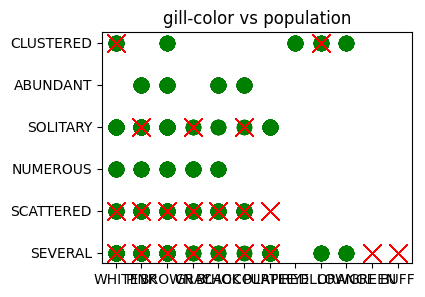

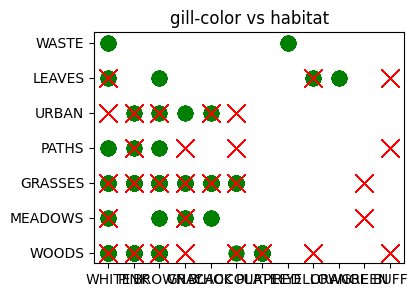

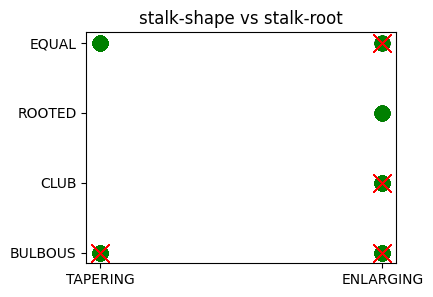

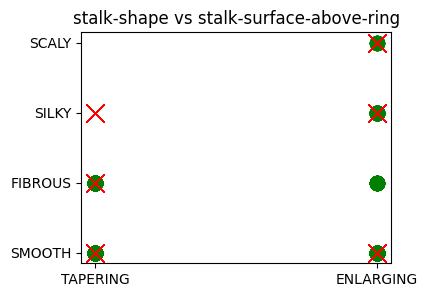

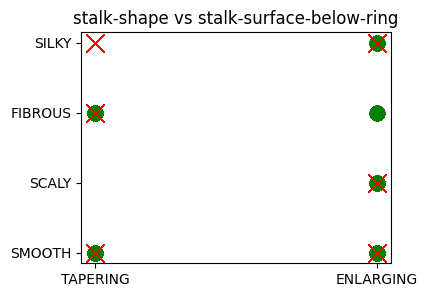

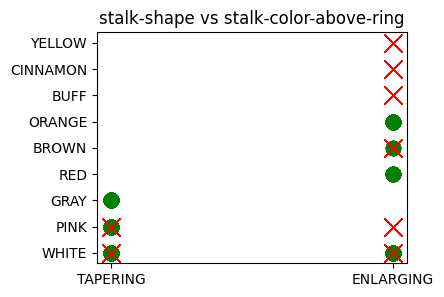

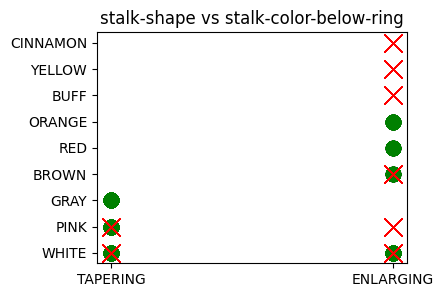

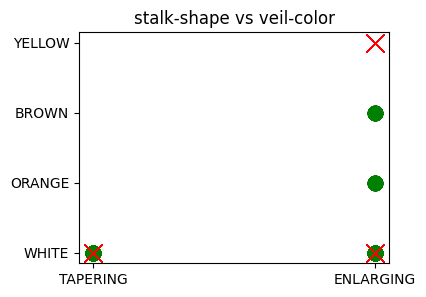

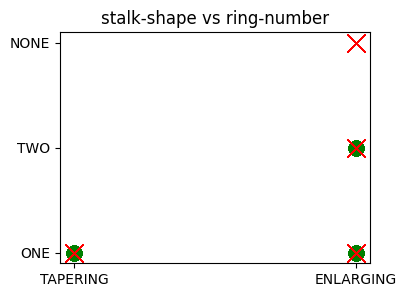

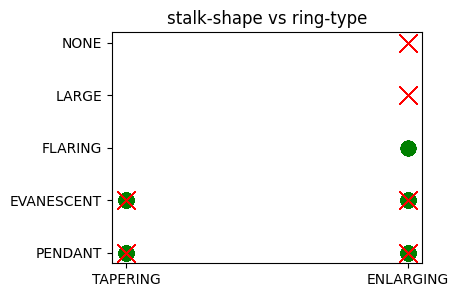

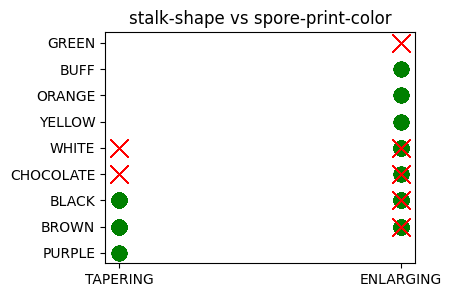

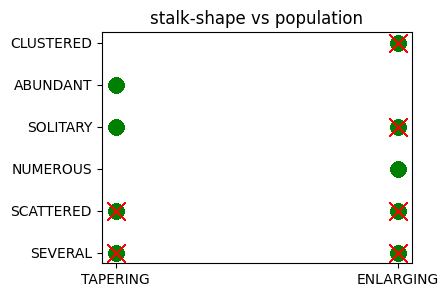

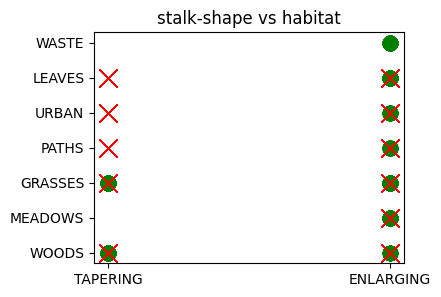

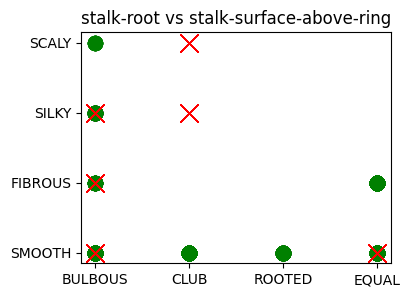

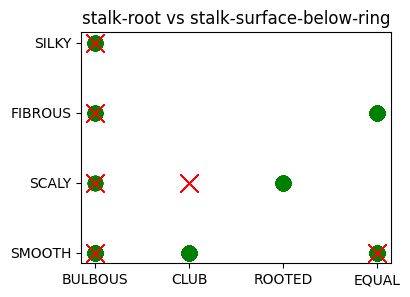

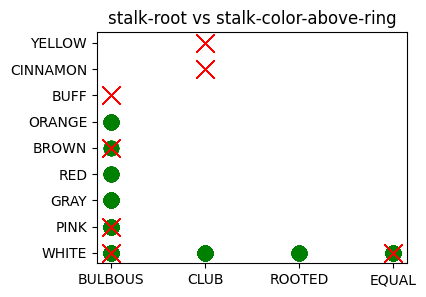

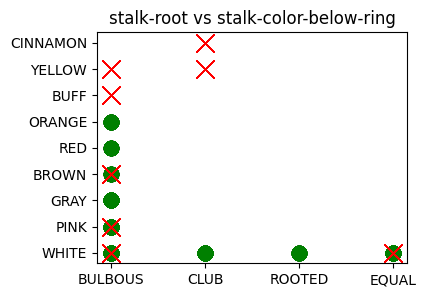

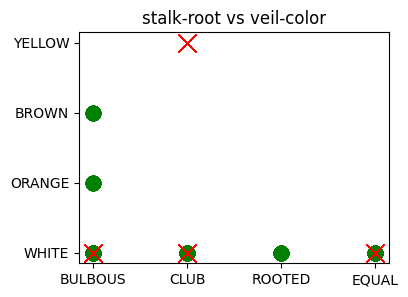

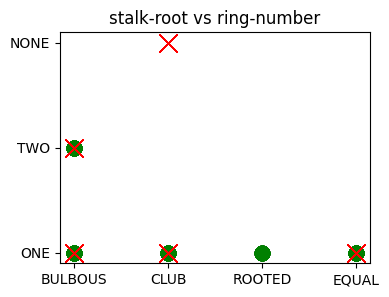

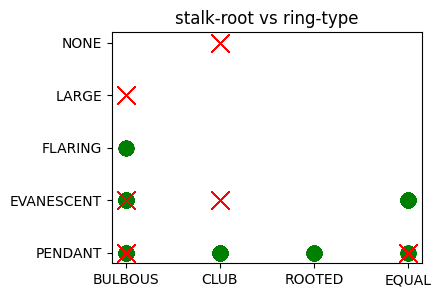

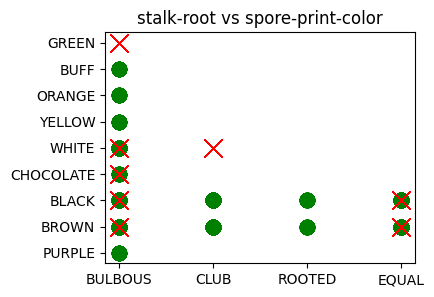

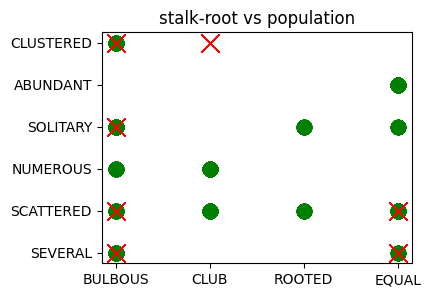

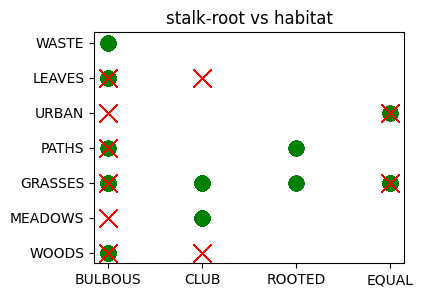

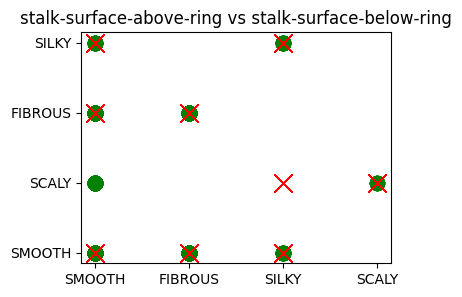

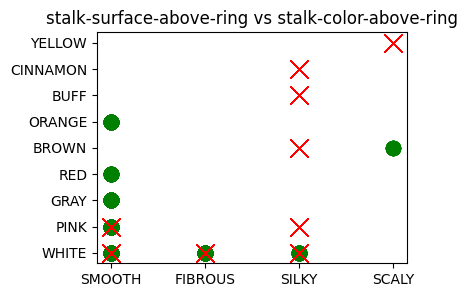

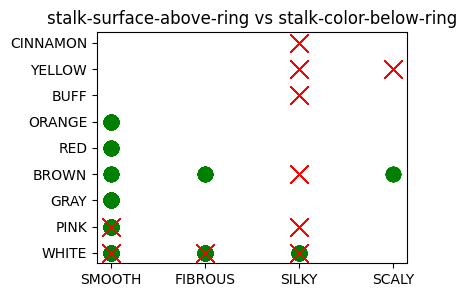

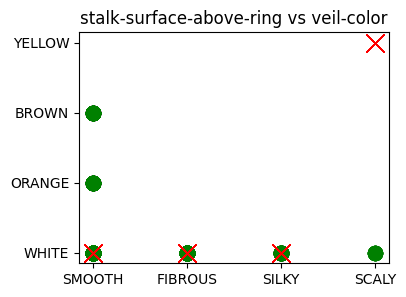

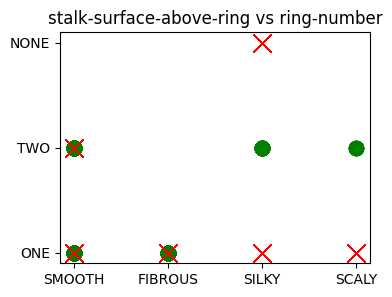

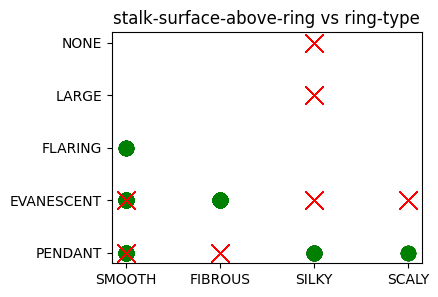

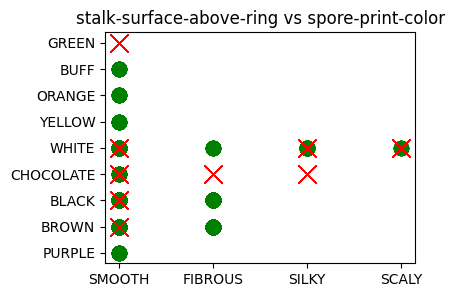

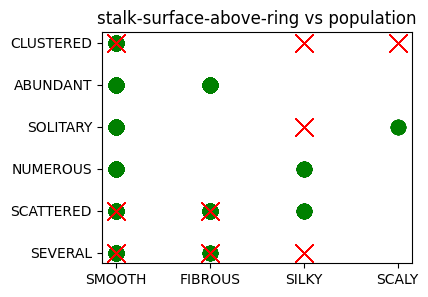

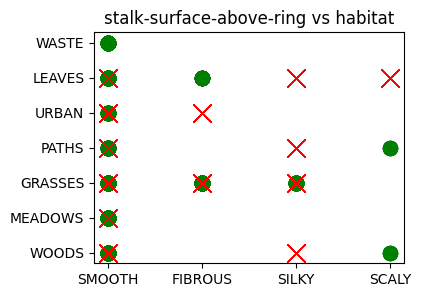

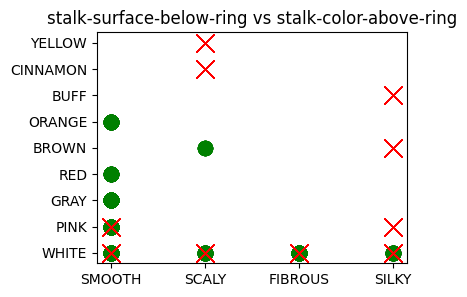

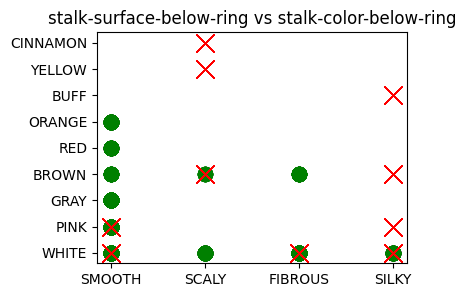

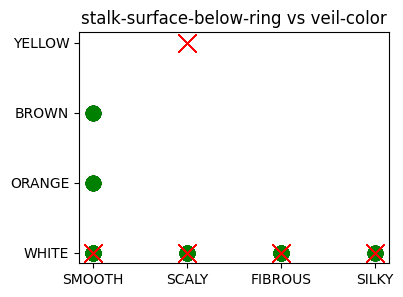

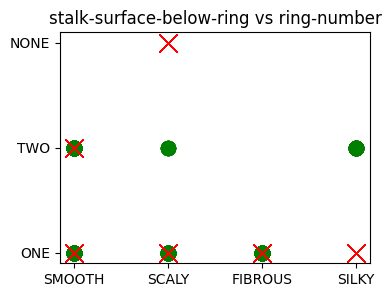

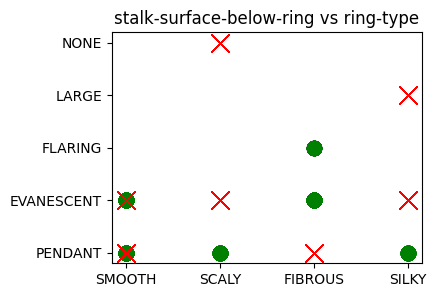

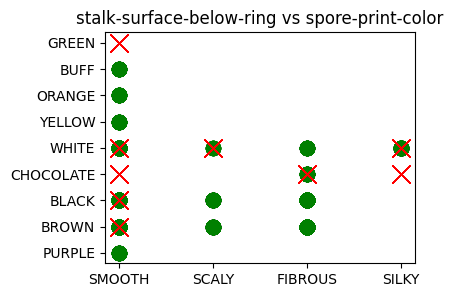

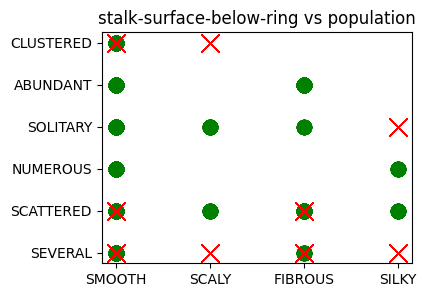

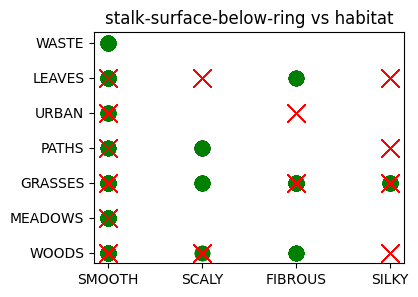

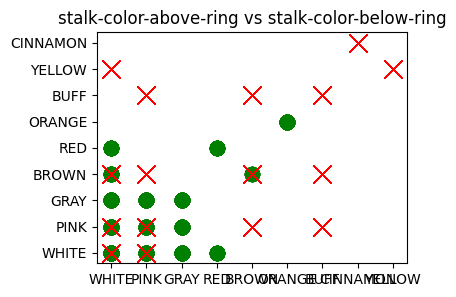

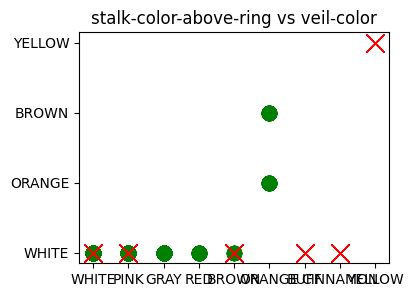

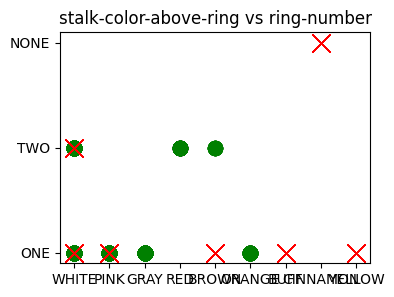

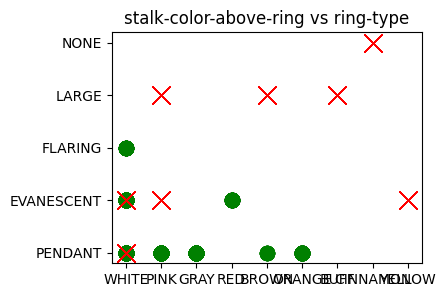

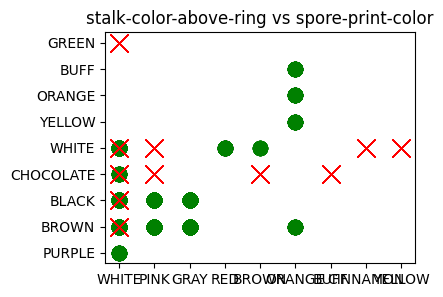

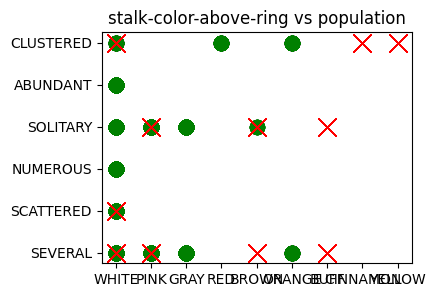

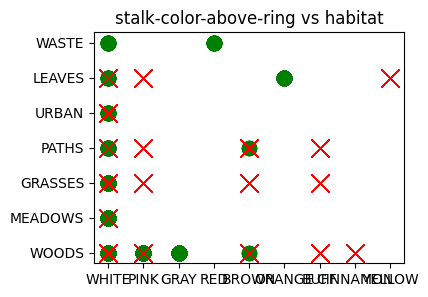

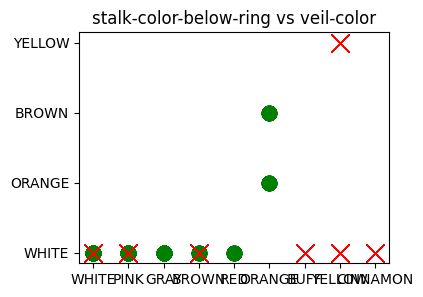

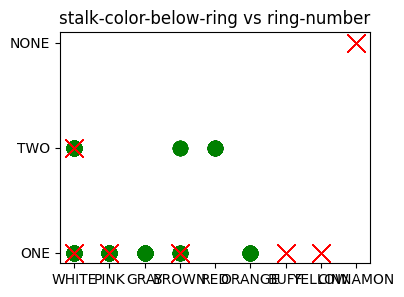

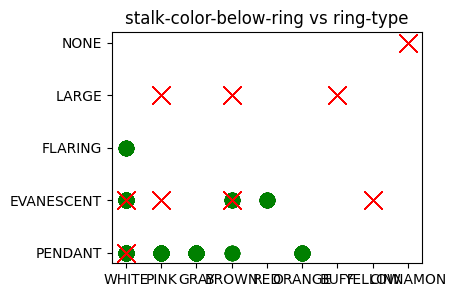

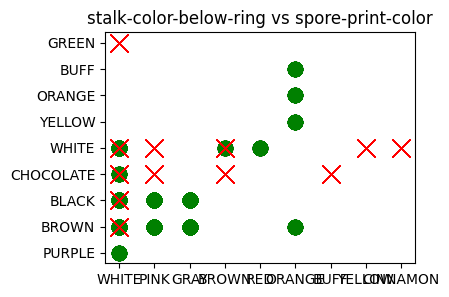

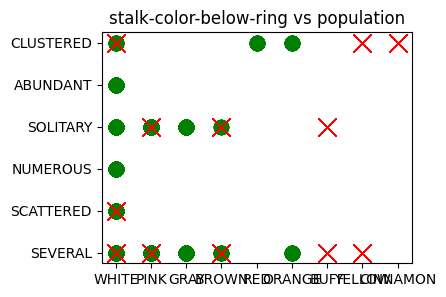

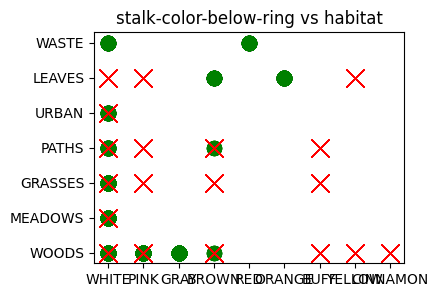

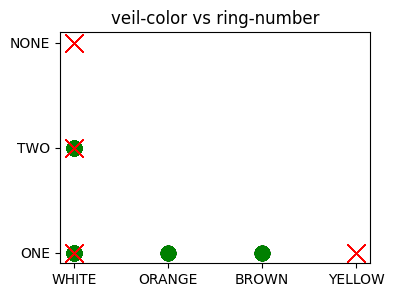

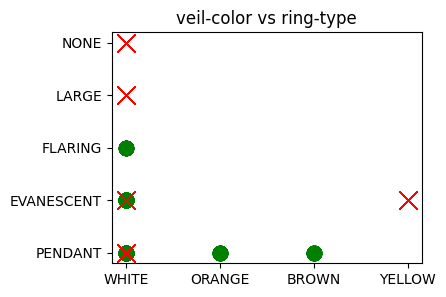

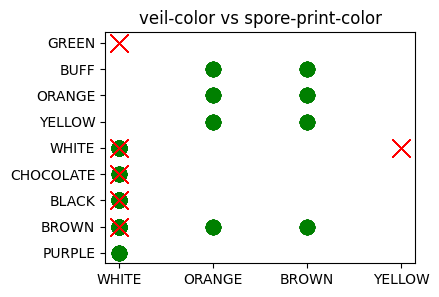

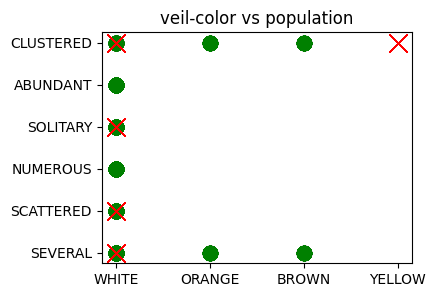

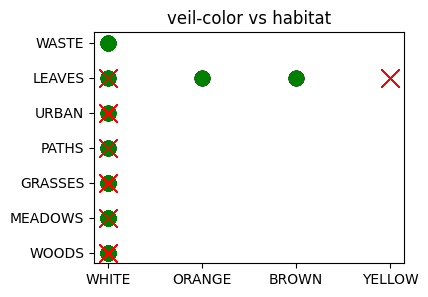

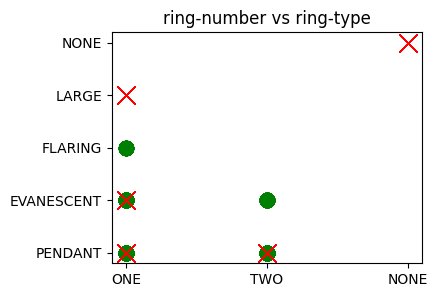

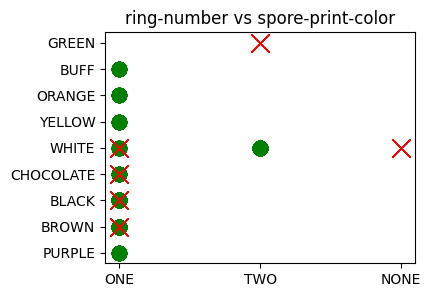

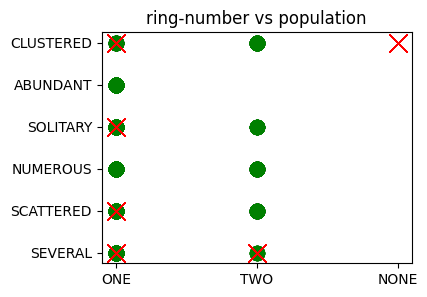

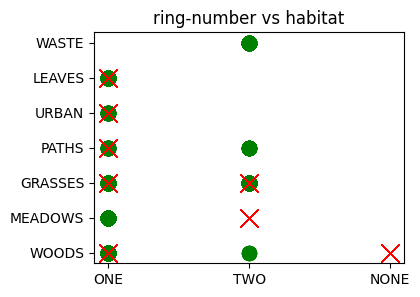

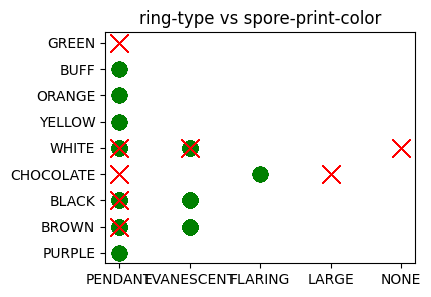

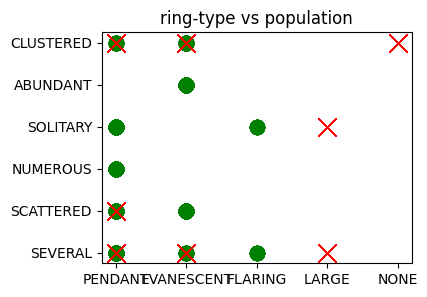

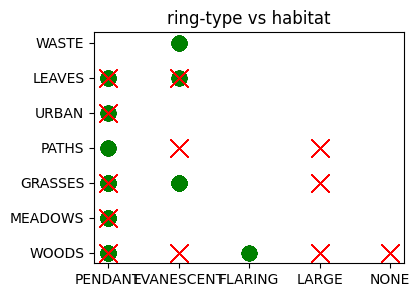

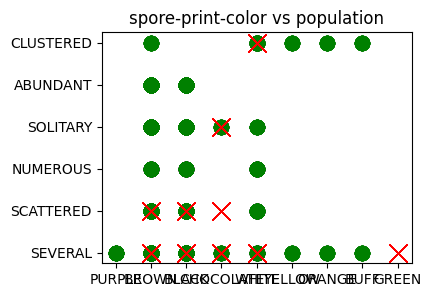

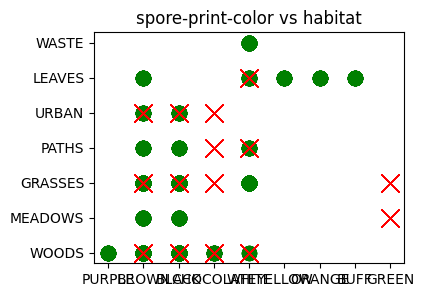

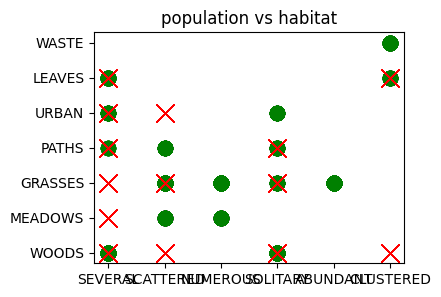

In [ ]:

# Generate all the required graphs to check the lesser ambiguous graphs
leng = len(props)
for i in range(0, leng):
    for j in range(i + 1, leng):
        plt.figure(figsize=(4, 3))
        title = f"{props[i]} vs {props[j]}"
        plt.title(title)
        plt.plot(props[i], props[j], 'go', data=edi, markersize=10)
        plt.plot(props[i], props[j], 'rx', data=poi, markersize=13)
        name=str(props[i]+' vs '+props[j])
        plt.savefig(name)

In [ ]:
print(df.columns)

Index(['classes', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [ ]:
X_categorical = df[['ring-type', 'spore-print-color', 'population', 'stalk-color-above-ring', 'odor', 'bruises','cap-color']]
encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = encoder.fit_transform(X_categorical)

# Create a DataFrame from the encoded features
X = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(X_categorical.columns))

# Separate target variable (y)
y = df['classes']

# Apply Logistic Regression
lm = LogisticRegression()
lm.fit(X, y)

# display(X)
# display(y)
y_pred = lm.predict(X)

p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


'precision = [0.99116608 1.        ]'

'recall = [1.        0.9898167]'

'f-score = [0.99556344 0.99488229]'

In [ ]:
# Apply SVM linear
clf = svm.SVC(kernel='linear')
# clf = svm.SVC(kernel='poly', degree=2)#, class_weight={0:1, 1:0.2}) # try degree=2,4
# clf = svm.SVC(kernel='rbf', gamma=90) # try gamma=.1,1
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.99468085 1.        ]'

'recall = [1.         0.99389002]'

'f-score = [0.99733333 0.99693565]'

In [ ]:
# Apply SVM polynomial degree 2
clf = svm.SVC(kernel='poly', degree=3)#, class_weight={0:1, 1:0.2}) # try degree=2,4
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.9964476 1.       ]'

'recall = [1.         0.99592668]'

'f-score = [0.99822064 0.99795918]'

In [ ]:
clf = svm.SVC(kernel='rbf', gamma=90) # try gamma=.1,1
clf.fit(X.values, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


'precision = [0.9964476 1.       ]'

'recall = [1.         0.99592668]'

'f-score = [0.99822064 0.99795918]'

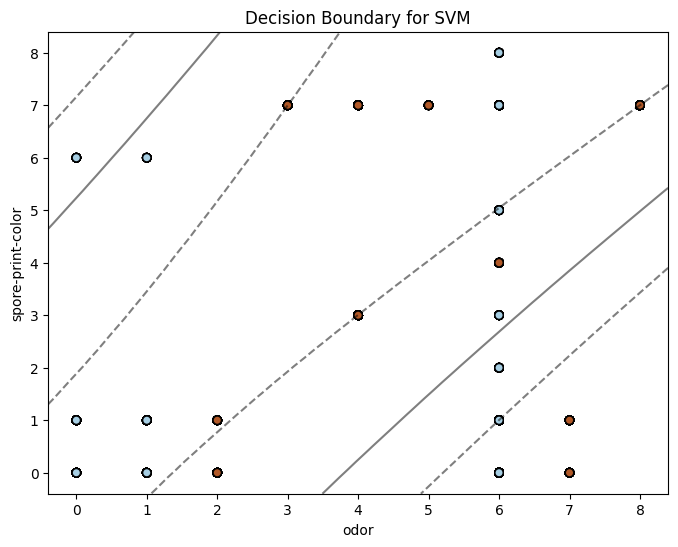

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
encoder = LabelEncoder()
encoded_df = df.apply(encoder.fit_transform)

# Select two features for visualization
feature1 = 'odor'
feature2 = 'spore-print-color'

# Extract features and target variable
X = encoded_df[[feature1, feature2]].values
y = encoded_df['classes'].values

# Train SVM model
svm_model = svm.SVC(kernel='poly', degree=2 )#svm.SVC(kernel='linear')
svm_model.fit(X, y)

# Plot decision boundary
plt.figure(figsize=(8, 6))

# Plot data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors='k')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_model.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundary for SVM')
plt.show()
